# Quantum Parallelism:

Leveraging quantum parallelism for certain types of computations.
Quantum speedup and limitations.

Quantum parallelism is a fundamental concept in quantum computing that allows quantum algorithms to process multiple possibilities simultaneously, providing a potential speedup over classical algorithms for certain types of computations. This phenomenon arises from the principles of superposition and entanglement in quantum mechanics. Let's explore the key aspects of quantum parallelism, including its principles, advantages, limitations, and equations.

### 1. **Principles of Quantum Parallelism:**
   - **Superposition:** Quantum bits (qubits) can exist in a superposition of multiple states simultaneously. This allows quantum algorithms to represent and process multiple inputs at once.
   - **Entanglement:** Qubits can be entangled, meaning the state of one qubit is correlated with the state of another, even if they are physically separated. This correlation enables information transfer and computation across entangled qubits.

### 2. **Quantum Speedup:**
   - Quantum parallelism enables algorithms to perform certain calculations exponentially faster than the best-known classical algorithms. Shor's algorithm for factoring and Grover's algorithm for searching are prominent examples of quantum speedup.
   - The speedup is often characterized by polynomial versus exponential time complexity. Quantum algorithms can solve certain problems in polynomial time that would require exponential time on classical computers.

### 3. **Quantum Speedup Equations:**
   - The time complexity of a quantum algorithm is often expressed as \(O(\sqrt{N})\) in the case of Grover's algorithm, where \(N\) is the size of the search space.
   - Shor's algorithm for factoring has an exponential speedup, reducing the complexity of factoring \(N\) to \(O((\log N)^3)\).

### 4. **Quantum Parallelism Applications:**
   - **Grover's Algorithm:** Provides quadratic speedup for unstructured search problems. The probability of finding the correct solution scales as \(\sqrt{N}\) compared to \(N\) in classical search.
   - **Shor's Algorithm:** Breaks RSA encryption by factoring large numbers exponentially faster than the best-known classical algorithms.
   - **Quantum Simulation:** Quantum computers can simulate quantum systems efficiently, offering insights into molecular structures, materials, and complex physical systems.

### 5. **Quantum Parallelism Limitations:**
   - **No General Speedup:** Quantum computers do not provide a general speedup for all types of problems. Classical algorithms are often more efficient for certain tasks.
   - **Quantum Error Correction:** Implementing error correction in quantum computers introduces additional computational overhead, impacting speedup.

### 6. **Quantum Parallelism Challenges:**
   - **Quantum Decoherence:** Quantum states are fragile and susceptible to decoherence, which can disrupt parallelism and lead to errors.
   - **Hardware Limitations:** Current quantum hardware faces challenges in scaling qubit numbers and maintaining coherence times, limiting the scale of parallelism.

### 7. **Equations and Complexity Measures:**
   - The speedup of quantum algorithms is often measured using the Big-O notation, expressing the computational complexity in terms of input size.

### Example:
   - **Grover's Algorithm:** The time complexity is \(O(\sqrt{N})\), where \(N\) is the size of the search space.

```latex
T(N) = O(\sqrt{N})
```

Quantum parallelism is a foundational aspect of quantum computing that holds the potential for transformative advancements in various fields. While quantum speedup is promising, addressing challenges such as error correction and hardware limitations is crucial for realizing the full potential of quantum parallelism.

In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to implement Grover's algorithm
def grover_algorithm(num_qubits, marked_item):
    # Create a quantum circuit with the specified number of qubits
    grover_circuit = QuantumCircuit(num_qubits, num_qubits)

    # Apply Hadamard gate to all qubits
    grover_circuit.h(range(num_qubits))

    # Oracle: Mark the item to be searched
    for qubit in range(num_qubits):
        grover_circuit.z(qubit) if marked_item & (1 << qubit) else grover_circuit.i(qubit)

    # Diffusion operator
    grover_circuit.h(range(num_qubits))
    grover_circuit.x(range(num_qubits))
    grover_circuit.h(num_qubits-1)
    grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)  # Multi-controlled Toffoli gate
    grover_circuit.h(num_qubits-1)
    grover_circuit.x(range(num_qubits))
    grover_circuit.h(range(num_qubits))

    grover_circuit.measure(range(num_qubits), range(num_qubits))

    return grover_circuit

# Simulate Grover's algorithm
num_qubits = 3
marked_item = 3  # Binary: 011 (marked item is 3 in decimal)
grover_circuit = grover_algorithm(num_qubits, marked_item)

# Visualize the circuit
grover_circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False)

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(assemble(transpiled_circuit)).result()

# Plot the histogram of measurement results
counts = result.get_counts()
plot_histogram(counts, title='Grover\'s Algorithm')
plt.show()


C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\3757419946.py:15: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  grover_circuit.z(qubit) if marked_item & (1 << qubit) else grover_circuit.i(qubit)
C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\3757419946.py:21: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)  # Multi-controlled Toffoli gate
C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\3757419946.py:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. T

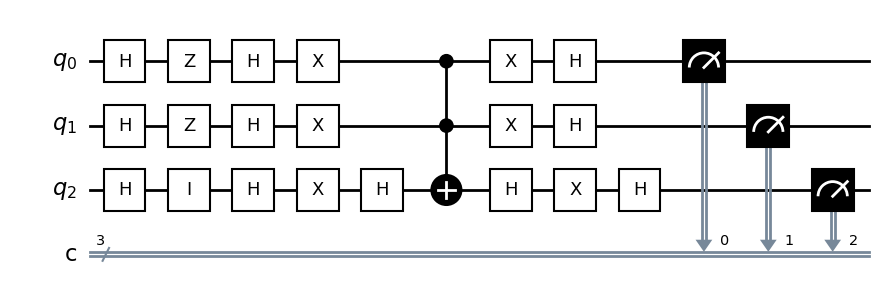

In [4]:
# Visualize the circuit
grover_circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=True)

In [7]:
# Plot the histogram of measurement results
counts = result.get_counts()
plot_histogram(counts, title='Grover\'s Algorithm')
plt.show()

In [5]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to create a quantum circuit demonstrating quantum parallelism
def quantum_parallelism_circuit(num_qubits):
    # Create a quantum circuit with the specified number of qubits
    parallelism_circuit = QuantumCircuit(num_qubits, num_qubits)

    # Apply Hadamard gate to all qubits
    parallelism_circuit.h(range(num_qubits))

    # Measure the qubits
    parallelism_circuit.measure(range(num_qubits), range(num_qubits))

    return parallelism_circuit

# Simulate quantum parallelism
num_qubits = 3
parallelism_circuit = quantum_parallelism_circuit(num_qubits)

# Visualize the circuit
parallelism_circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False)

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(parallelism_circuit, simulator)
result = simulator.run(assemble(transpiled_circuit)).result()

# Plot the histogram of measurement results
counts = result.get_counts()
plot_histogram(counts, title='Quantum Parallelism')
plt.show()


C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\3248522924.py:28: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpiled_circuit)).result()


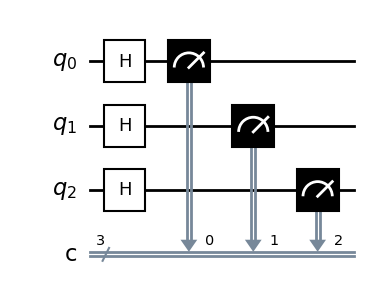

In [6]:
# Visualize the circuit
parallelism_circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False)

In [8]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to implement Grover's algorithm
def grover_algorithm(num_qubits, marked_item):
    # Create a quantum circuit with the specified number of qubits
    grover_circuit = QuantumCircuit(num_qubits, num_qubits)

    # Apply Hadamard gate to all qubits
    grover_circuit.h(range(num_qubits))

    # Oracle: Mark the item to be searched
    for qubit in range(num_qubits):
        grover_circuit.z(qubit) if marked_item & (1 << qubit) else grover_circuit.i(qubit)

    # Diffusion operator
    grover_circuit.h(range(num_qubits))
    grover_circuit.x(range(num_qubits))
    grover_circuit.h(num_qubits-1)
    grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)  # Multi-controlled Toffoli gate
    grover_circuit.h(num_qubits-1)
    grover_circuit.x(range(num_qubits))
    grover_circuit.h(range(num_qubits))

    grover_circuit.measure(range(num_qubits), range(num_qubits))

    return grover_circuit

# Simulate Grover's algorithm
num_qubits = 4
marked_item = 7  # Binary: 0111 (marked item is 7 in decimal)
grover_circuit = grover_algorithm(num_qubits, marked_item)

# Visualize the circuit
grover_circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False)

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(assemble(transpiled_circuit)).result()

# Plot the histogram of measurement results
counts = result.get_counts()
plot_histogram(counts, title='Grover\'s Algorithm')
plt.show()


C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\1117688319.py:15: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  grover_circuit.z(qubit) if marked_item & (1 << qubit) else grover_circuit.i(qubit)
C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\1117688319.py:21: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)  # Multi-controlled Toffoli gate
C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\1117688319.py:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. T

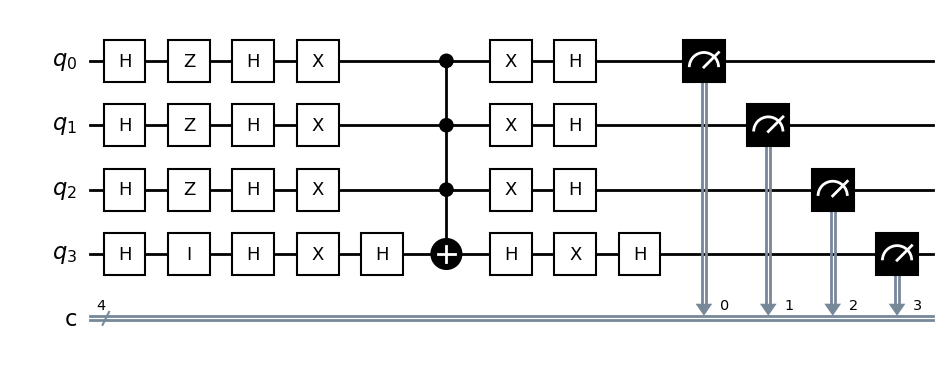

In [9]:
# Visualize the circuit
grover_circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False)

In [10]:
import math

# Classical brute-force search algorithm
def classical_search(search_space, target):
    for i, item in enumerate(search_space):
        if item == target:
            return i
    return -1

# Quantum speedup equation for Grover's algorithm
def grover_speedup(search_space_size):
    classical_complexity = search_space_size
    quantum_complexity = math.sqrt(search_space_size)
    speedup_factor = classical_complexity / quantum_complexity
    return speedup_factor

# Simulate quantum speedup for different search space sizes
search_space_sizes = [2, 4, 8, 16, 32]
for search_space_size in search_space_sizes:
    classical_complexity = search_space_size
    quantum_complexity = math.sqrt(search_space_size)
    speedup_factor = grover_speedup(search_space_size)

    print(f"Search Space Size: {search_space_size}")
    print(f"Classical Complexity: O({classical_complexity})")
    print(f"Quantum Complexity: O({quantum_complexity})")
    print(f"Speedup Factor: {speedup_factor:.2f}\n")


Search Space Size: 2
Classical Complexity: O(2)
Quantum Complexity: O(1.4142135623730951)
Speedup Factor: 1.41

Search Space Size: 4
Classical Complexity: O(4)
Quantum Complexity: O(2.0)
Speedup Factor: 2.00

Search Space Size: 8
Classical Complexity: O(8)
Quantum Complexity: O(2.8284271247461903)
Speedup Factor: 2.83

Search Space Size: 16
Classical Complexity: O(16)
Quantum Complexity: O(4.0)
Speedup Factor: 4.00

Search Space Size: 32
Classical Complexity: O(32)
Quantum Complexity: O(5.656854249492381)
Speedup Factor: 5.66



In [11]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to create a quantum circuit demonstrating quantum parallelism
def quantum_parallelism_circuit(num_qubits):
    # Create a quantum circuit with the specified number of qubits
    parallelism_circuit = QuantumCircuit(num_qubits, num_qubits)

    # Apply Hadamard gate to all qubits
    parallelism_circuit.h(range(num_qubits))

    # Measure the qubits
    parallelism_circuit.measure(range(num_qubits), range(num_qubits))

    return parallelism_circuit

# Simulate quantum parallelism
num_qubits = 3
parallelism_circuit = quantum_parallelism_circuit(num_qubits)

# Visualize the circuit
parallelism_circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False)

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(parallelism_circuit, simulator)
result = simulator.run(assemble(transpiled_circuit)).result()

# Plot the histogram of measurement results
counts = result.get_counts()
plot_histogram(counts, title='Quantum Parallelism')
plt.show()


C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\3248522924.py:28: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpiled_circuit)).result()


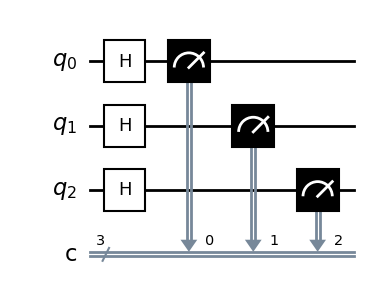

In [12]:
# Visualize the circuit
parallelism_circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False)

C:\Users\yashr\AppData\Local\Temp\ipykernel_12352\699863852.py:23: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


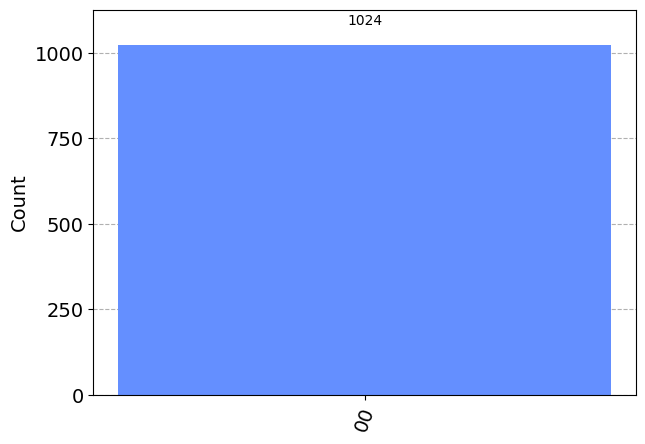

In [13]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits
n_qubits = 2
qc = QuantumCircuit(n_qubits, n_qubits)

# Apply a Hadamard gate to both qubits (creating a superposition)
qc.h(range(n_qubits))

# Apply an X gate to the first qubit (flipping its state)
qc.x(0)

# Apply a Hadamard gate again to both qubits
qc.h(range(n_qubits))

# Measure the qubits
qc.measure(range(n_qubits), range(n_qubits))

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(assemble(compiled_circuit)).result()

# Display the measurement results
counts = result.get_counts(qc)
plot_histogram(counts)


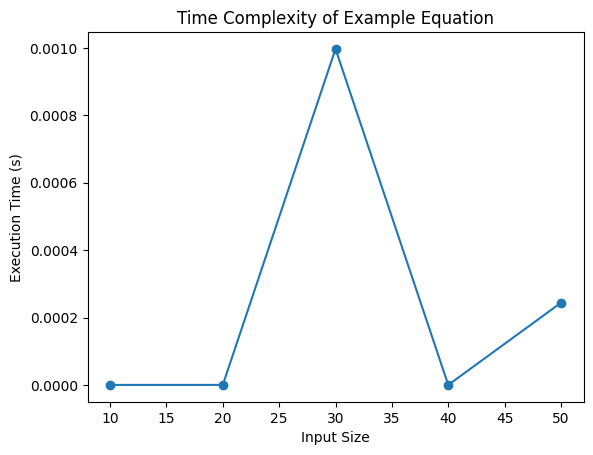

In [14]:
import time
import matplotlib.pyplot as plt

def example_equation(n):
    result = 0
    for i in range(n):
        for j in range(n):
            result += i * j
    return result

def measure_time_complexity(func, input_sizes):
    execution_times = []
    for size in input_sizes:
        start_time = time.time()
        func(size)
        end_time = time.time()
        execution_times.append(end_time - start_time)
    return execution_times

# Define input sizes for the equation
input_sizes = [10, 20, 30, 40, 50]

# Measure the time complexity of the example equation
execution_times = measure_time_complexity(example_equation, input_sizes)

# Plot the results
plt.plot(input_sizes, execution_times, marker='o')
plt.title('Time Complexity of Example Equation')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (s)')
plt.show()


# Lists of all the topics in Quantum Parallelism

Quantum parallelism is a concept in quantum computing that allows certain quantum algorithms to process multiple possibilities simultaneously. The idea is based on the principles of superposition and entanglement in quantum mechanics. Below is a list of key topics related to quantum parallelism:

1. **Superposition:** Quantum bits (qubits) can exist in multiple states simultaneously, allowing quantum computers to represent and process multiple possibilities in parallel.

2. **Entanglement:** Quantum entanglement is a phenomenon where qubits become correlated with each other, even when separated by large distances. Changes to one qubit will instantly affect its entangled partner.

3. **Quantum Gates:** Similar to classical logic gates, quantum gates are operations that manipulate qubits. Gates like Hadamard, CNOT, and Phase gates are essential for creating superpositions and entanglements.

4. **Quantum Circuit:** A quantum circuit is a series of quantum gates applied to qubits. Quantum algorithms, including those leveraging quantum parallelism, are implemented using quantum circuits.

5. **Quantum Fourier Transform (QFT):** QFT is a quantum algorithm that efficiently performs the Fourier transform on a quantum state. It is a key component in many quantum algorithms, including Shor's algorithm.

6. **Shor's Algorithm:** Shor's algorithm is a quantum algorithm for integer factorization, which has the potential to efficiently factor large numbers, threatening classical public-key cryptography.

7. **Grover's Algorithm:** Grover's algorithm is a quantum search algorithm that can provide a quadratic speedup over classical algorithms for unstructured databases.

8. **Quantum Amplitude Amplification:** A general technique used in quantum algorithms, such as Grover's algorithm, to amplify the amplitude of the correct solution and improve the probability of finding the solution upon measurement.

9. **Quantum Phase Estimation:** Quantum phase estimation is a quantum algorithm for estimating the eigenvalues of a unitary operator, and it is a crucial subroutine in various quantum algorithms.

10. **Quantum Oracle:** In quantum algorithms, an oracle is a black-box subroutine that implements specific functions and provides information to the quantum algorithm through quantum queries.

11. **Quantum Speedup:** The concept that certain quantum algorithms can solve specific problems faster than their best-known classical counterparts, providing a potential advantage in terms of computation time.

Understanding these topics is essential for grasping the principles and potential applications of quantum parallelism in quantum computing. Keep in mind that quantum computing is a rapidly evolving field, and new developments may contribute to a deeper understanding of quantum parallelism and its implications.

# Superposition: Quantum bits (qubits) can exist in multiple states simultaneously, allowing quantum computers to represent and process multiple possibilities in parallel.

**Superposition in Quantum Computing:**

**Definition:**
Superposition is a fundamental principle in quantum mechanics that allows quantum bits (qubits) to exist in multiple states simultaneously. This is in stark contrast to classical bits, which can only be in one of two states: 0 or 1. In a superposition, a qubit can represent a combination, or superposition, of both 0 and 1 at the same time.

**Mathematical Representation:**
For a single qubit, the superposition is mathematically represented as:

\[ |\psi\rangle = \alpha |0\rangle + \beta |1\rangle \]

Here, \( |\psi\rangle \) is the state of the qubit, \( \alpha \) and \( \beta \) are complex numbers (probability amplitudes), and \( |0\rangle \) and \( |1\rangle \) are the basis states representing classical 0 and 1.

**Probability and Normalization:**
The probabilities of measuring the qubit in states 0 and 1 are given by the squared magnitudes of the amplitudes:

\[ P(0) = |\alpha|^2 \]
\[ P(1) = |\beta|^2 \]

Additionally, the probabilities must sum to 1, ensuring the qubit is in a valid state:

\[ |\alpha|^2 + |\beta|^2 = 1 \]

**Visualization:**
In a Bloch sphere representation, a qubit in superposition is represented as a point on the surface of the sphere, not at either pole.

**Example:**
Let's consider an equal superposition state:

\[ |\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \]

In this case, \( \alpha = \beta = \frac{1}{\sqrt{2}} \). The probabilities of measuring 0 or 1 are both \( \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} \), and they sum to 1.

**Quantum Circuit:**
In a quantum circuit, the Hadamard gate (\(H\)) is often used to create a superposition. For example, applying \(H\) to the basis state \(|0\rangle\) produces an equal superposition:

```python
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply a Hadamard gate to create a superposition
qc.h(0)

# Visualize the quantum circuit
print(qc)

# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(assemble(transpile(qc), simulator)).result()

# Get the final state vector
state_vector = result.get_statevector()

print(f"Final state vector: {state_vector}")
```

In this example, the state vector of the qubit after applying the Hadamard gate will be \(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\), representing a superposition.

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply a Hadamard gate to create a superposition
qc.h(0)

# Visualize the quantum circuit
print(qc)

# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(assemble(transpile(qc), simulator)).result()

# Get the final state vector
state_vector = result.get_statevector()

print(f"Final state vector: {state_vector}")

   ┌───┐
q: ┤ H ├
   └───┘
Final state vector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


C:\Users\yashr\AppData\Local\Temp\ipykernel_7484\3220828259.py:14: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpile(qc), simulator)).result()


In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply a Hadamard gate to create a superposition
qc.h(0)

# Visualize the quantum circuit
print(qc)

# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(assemble(transpile(qc), simulator)).result()

# Get the final state vector
state_vector = result.get_statevector()

print(f"Final state vector: {state_vector}")


   ┌───┐
q: ┤ H ├
   └───┘
Final state vector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


C:\Users\yashr\AppData\Local\Temp\ipykernel_7484\2802086625.py:14: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpile(qc), simulator)).result()


# Entanglement: Quantum entanglement is a phenomenon where qubits become correlated with each other, even when separated by large distances. Changes to one qubit will instantly affect its entangled partner.

### Entanglement in Quantum Mechanics:

**Definition:**
Quantum entanglement is a fundamental phenomenon in quantum mechanics where quantum particles, such as qubits, become correlated in such a way that the state of one particle is directly related to the state of another, even when they are separated by large distances. The entangled particles are described by a joint quantum state, and changes to one particle will instantaneously affect its entangled partner, regardless of the distance between them.

**Mathematical Representation:**
Entanglement is typically represented using the concept of a composite quantum state. Consider a system with two qubits, \(|\psi_1\rangle\) and \(|\psi_2\rangle\), the entangled state can be expressed as:

\[ |\Psi\rangle = \frac{1}{\sqrt{2}} \left( |\psi_1\rangle \otimes |\psi_2\rangle - |\psi_2\rangle \otimes |\psi_1\rangle \right) \]

Here, \(\otimes\) denotes the tensor product, and the coefficients ensure that the state is normalized.

**Bell States:**
The most famous entangled states are the Bell states. The Bell state \(|\Phi^+\rangle\) can be represented as:

\[ |\Phi^+\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right) \]

This state represents perfect correlation between the two qubits. The other Bell states (\(|\Phi^-\rangle\), \(|\Psi^+\rangle\), \(|\Psi^-\rangle\)) also demonstrate various forms of entanglement.

**Quantum Entanglement and Superposition:**
Entanglement is closely related to the concept of superposition. While superposition allows a single qubit to exist in multiple states simultaneously, entanglement extends this idea to multiple qubits, creating a joint state where the states of the individual qubits are interconnected.

**EPR Paradox and Non-Locality:**
Entanglement was famously discussed by Albert Einstein, Boris Podolsky, and Nathan Rosen (EPR) in their EPR paradox paper. They argued that quantum mechanics might be incomplete because of what they termed "spooky action at a distance." However, subsequent experiments, such as those testing Bell's inequalities, confirmed the non-local correlations predicted by entanglement.

**Applications:**
- Quantum entanglement plays a crucial role in quantum information processing tasks, including quantum key distribution (QKD) for secure communication.
- It has been proposed for applications in quantum teleportation, quantum computing, and quantum cryptography.

**Equations:**
The mathematical formalism of quantum entanglement involves the description of joint quantum states using tensor products, as shown in the earlier equations.

### Conclusion:
Quantum entanglement is a remarkable feature of quantum mechanics that defies classical intuition. It forms the basis for various quantum technologies and highlights the non-local nature of quantum correlations. While it has been thoroughly tested experimentally, the philosophical implications of entanglement continue to be a topic of discussion in the foundations of quantum mechanics.

C:\Users\yashr\AppData\Local\Temp\ipykernel_7484\705216308.py:25: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(assemble(compiled_circuit)).result()


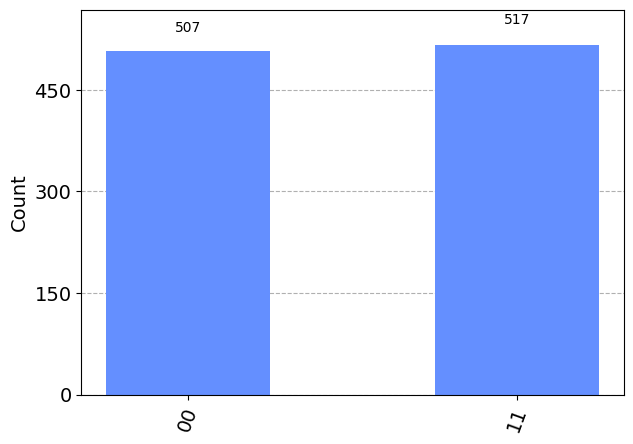

In [3]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

def create_entangled_state():
    # Create a quantum circuit with two qubits
    entangled_circuit = QuantumCircuit(2, 2)

    # Apply Hadamard gate to the first qubit
    entangled_circuit.h(0)

    # Apply CNOT gate to create entanglement between qubits 0 and 1
    entangled_circuit.cx(0, 1)

    # Measure qubits
    entangled_circuit.measure([0, 1], [0, 1])

    return entangled_circuit

# Create the entangled state circuit
entangled_circuit = create_entangled_state()

# Simulate the quantum circuit using the Qiskit Aer simulator
backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(entangled_circuit, backend)
result = backend.run(assemble(compiled_circuit)).result()

# Plot the results
counts = result.get_counts()
plot_histogram(counts)


# Quantum Gates: Similar to classical logic gates, quantum gates are operations that manipulate qubits. Gates like Hadamard, CNOT, and Phase gates are essential for creating superpositions and entanglements.

Quantum gates are fundamental building blocks in quantum computing. They are analogous to classical logic gates but operate on qubits instead of classical bits. Quantum gates are used to manipulate the quantum state of qubits, enabling the creation of quantum circuits for various quantum algorithms. Below, I'll provide information on some essential quantum gates, including Hadamard gate, CNOT gate, and Phase gate, along with their equations and explanations.

### 1. Hadamard Gate:

The Hadamard gate is a one-qubit gate that creates superpositions. It transforms the basis states \(|0\rangle\) and \(|1\rangle\) into an equal superposition of both states.

**Mathematical Representation:**
The Hadamard gate is represented by the following matrix:

\[ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \]

**Operation on Basis States:**
\[ H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \]
\[ H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \]

### 2. CNOT Gate (Controlled-NOT):

The CNOT gate is a two-qubit gate that performs a NOT operation on the target qubit (flipping its state) only if the control qubit is in the state \(|1\rangle\).

**Mathematical Representation:**
The CNOT gate is represented by the following matrix:

\[ \text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \]

**Operation on Basis States:**
\[ \text{CNOT}(|00\rangle) = |00\rangle \]
\[ \text{CNOT}(|01\rangle) = |01\rangle \]
\[ \text{CNOT}(|10\rangle) = |11\rangle \]
\[ \text{CNOT}(|11\rangle) = |10\rangle \]

### 3. Phase Gate:

The Phase gate introduces a phase shift in the quantum state, modifying the probability amplitudes of the basis states.

**Mathematical Representation:**
The Phase gate is represented by the following matrix:

\[ S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \]

**Operation on Basis States:**
\[ S|0\rangle = |0\rangle \]
\[ S|1\rangle = i|1\rangle \]

### 4. X Gate:

The X gate is a one-qubit gate that performs a classical NOT operation on a qubit, flipping its state.

**Mathematical Representation:**
The X gate is represented by the Pauli-X matrix:

\[ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \]

**Operation on Basis States:**
\[ X|0\rangle = |1\rangle \]
\[ X|1\rangle = |0\rangle \]

### 5. Y Gate:

The Y gate is a one-qubit gate that performs a Pauli-Y rotation on a qubit.

**Mathematical Representation:**
The Y gate is represented by the Pauli-Y matrix:

\[ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \]

**Operation on Basis States:**
\[ Y|0\rangle = i|1\rangle \]
\[ Y|1\rangle = -i|0\rangle \]

These gates are just a few examples, and there are many more gates in quantum computing with various functionalities. Quantum circuits are constructed by combining these gates to perform specific quantum algorithms. The mathematical representations and operations on basis states provided here are foundational concepts in quantum computation.

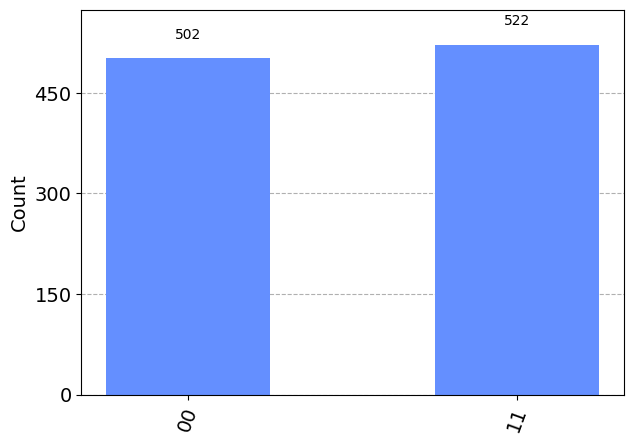

In [4]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Hadamard gate on the first qubit
qc.h(0)

# Apply CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)

# Apply Phase gate on the second qubit
qc.s(1)

# Measure the qubits
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
result = execute(transpiled_qc, simulator).result()

# Plot the results
counts = result.get_counts()
plot_histogram(counts)


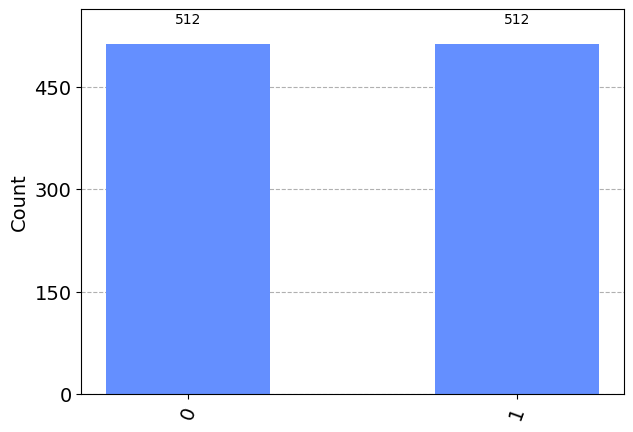

In [5]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Hadamard gate to the qubit
qc.h(0)

# Measure the qubit
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
result = execute(transpiled_qc, simulator).result()

# Plot the results
counts = result.get_counts()
plot_histogram(counts)


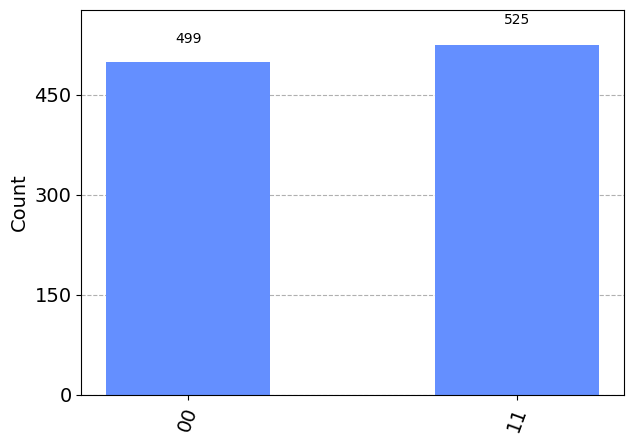

In [6]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Apply CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)

# Measure the qubits
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
result = execute(transpiled_qc, simulator).result()

# Plot the results
counts = result.get_counts()
plot_histogram(counts)


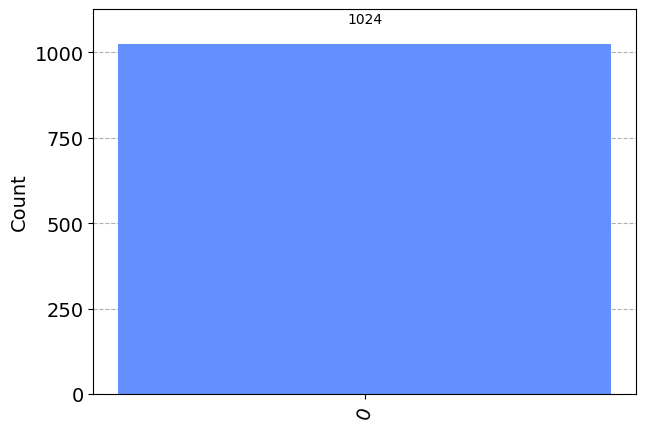

In [7]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Phase gate to the qubit
qc.s(0)

# Measure the qubit
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
result = execute(transpiled_qc, simulator).result()

# Plot the results
counts = result.get_counts()
plot_histogram(counts)


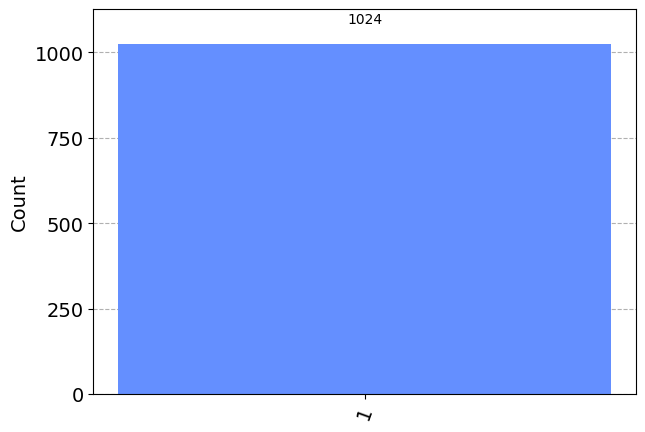

In [8]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply X gate to the qubit
qc.x(0)

# Measure the qubit
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
result = execute(transpiled_qc, simulator).result()

# Plot the results
counts = result.get_counts()
plot_histogram(counts)


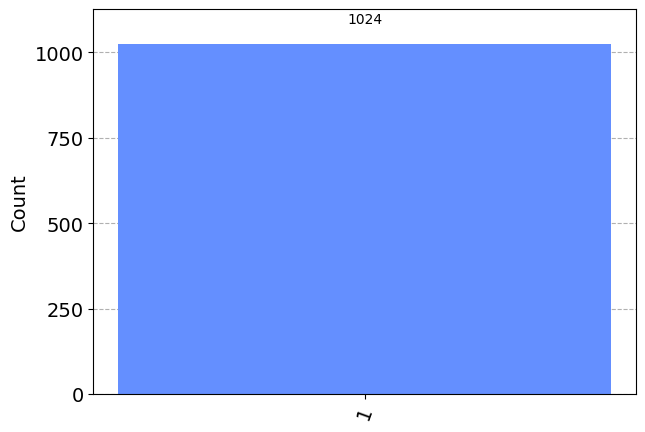

In [9]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Y gate to the qubit
qc.y(0)

# Measure the qubit
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
result = execute(transpiled_qc, simulator).result()

# Plot the results
counts = result.get_counts()
plot_histogram(counts)


# Quantum Circuit: A quantum circuit is a series of quantum gates applied to qubits. Quantum algorithms, including those leveraging quantum parallelism, are implemented using quantum circuits.

A quantum circuit is a computational model used in quantum computing to perform operations on quantum bits or qubits. These circuits are composed of quantum gates that manipulate the state of qubits, enabling the implementation of quantum algorithms. Quantum circuits play a central role in expressing and understanding quantum algorithms and computations.

Here is a breakdown of key concepts related to quantum circuits:

### Quantum Bits (Qubits):
- **Quantum Bit (Qubit):** The fundamental unit of quantum information. Unlike classical bits, qubits can exist in superpositions of states, allowing them to represent 0, 1, or both simultaneously.

### Quantum Gates:
- **Quantum Gate:** An elementary quantum operation that manipulates the state of one or more qubits. Common quantum gates include Hadamard gate (H), Pauli gates (X, Y, Z), Phase gate (S), and Controlled-NOT gate (CNOT), among others.

### Quantum Circuit Structure:
- **Quantum Circuit Diagram:** Graphical representation of a quantum circuit, where qubits are represented as lines and gates are depicted as symbols. Time progresses from left to right, indicating the sequence of operations.

### Quantum Circuit Operations:
- **Quantum Superposition:** The ability of qubits to exist in multiple states simultaneously. Superposition is leveraged to perform parallel computations in quantum algorithms.

- **Quantum Entanglement:** A phenomenon where qubits become correlated and the state of one qubit is dependent on the state of another, even when physically separated. Entanglement is often used in quantum communication and certain quantum algorithms.

- **Quantum Measurement:** The process of obtaining information from a qubit by measuring its state. Measurement collapses the qubit's superposition into one of its basis states (0 or 1).

### Quantum Circuit Evolution:
- **Quantum Circuit Evolution:** The progression of a quantum circuit through time. Quantum gates are applied sequentially, and the quantum state evolves accordingly.

### Quantum Algorithm Implementation:
- **Quantum Algorithm:** A set of instructions for solving a specific problem using a quantum computer. Quantum algorithms are typically expressed in terms of quantum circuits.

- **Quantum Parallelism:** The ability of quantum algorithms to process multiple possibilities simultaneously. This arises from the superposition property of qubits.

### Equations and Mathematical Representation:
- **Quantum State Vector:** The mathematical representation of the state of qubits in a quantum circuit. It is often denoted as \(|\psi\rangle\) and evolves as quantum gates are applied.

- **Unitary Operator:** Quantum gates are represented by unitary matrices. The application of a gate is equivalent to multiplying the quantum state vector by the corresponding unitary matrix.

\[ |\psi_{\text{new}}\rangle = U |\psi_{\text{old}}\rangle \]

### Example Quantum Circuit (Superposition and Entanglement):
Let's consider a simple quantum circuit with two qubits:

\[ |\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \]

This represents a Bell state, where the qubits are entangled and exist in a superposition of the states |00⟩ and |11⟩.

```plaintext
Quantum Circuit:
q_0: ───H───@───
           │
q_1: ───────X───
```

This circuit applies a Hadamard gate (H) to the first qubit, creating a superposition of |0⟩ and |1⟩, and then a CNOT gate (controlled-X) entangling the two qubits.

Quantum circuits are a foundational concept in quantum computing, and understanding their structure and operations is essential for working with quantum algorithms and quantum information processing.

Quantum Circuit:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


C:\Users\yashr\anaconda3\New folder\Anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


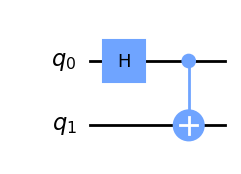

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Apply a controlled-X (CNOT) gate with the first qubit as control and the second qubit as target
qc.cx(0, 1)

# Print the quantum circuit
print("Quantum Circuit:")
print(qc)

# Visualize the quantum circuit
qc.draw(output='mpl')


# Quantum Fourier Transform (QFT): QFT is a quantum algorithm that efficiently performs the Fourier transform on a quantum state. It is a key component in many quantum algorithms, including Shor's algorithm

The Quantum Fourier Transform (QFT) is a quantum algorithm that efficiently performs the discrete Fourier transform on a quantum state. It plays a crucial role in many quantum algorithms, with Shor's algorithm being one of the most notable applications. Below, I'll provide an overview of the Quantum Fourier Transform, its mathematical representation, and its application in Shor's algorithm.

### Discrete Fourier Transform (DFT):

The classical Discrete Fourier Transform (DFT) is defined as follows:

\[ X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-\frac{2\pi i}{N}nk} \]

Here, \( x_n \) is the input sequence of length \( N \), and \( X_k \) is the corresponding output sequence.

### Quantum Fourier Transform (QFT):

The Quantum Fourier Transform is a quantum analog of the classical DFT. Given a quantum state \( \vert x \rangle = \sum_{n=0}^{N-1} x_n \vert n \rangle \), the QFT transforms it into a new state \( \vert \tilde{x} \rangle \):

\[ \vert \tilde{x} \rangle = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} X_k \vert k \rangle \]

The transformation is defined by the unitary operator \( U_{\text{QFT}} \):

\[ U_{\text{QFT}} \vert x \rangle = \vert \tilde{x} \rangle \]

The QFT can be implemented using a circuit of Hadamard gates and controlled phase gates.

### Quantum Fourier Transform Circuit:

A common quantum circuit for a QFT of \( N \) qubits involves Hadamard gates and controlled-phase gates. The QFT circuit for a 3-qubit state is shown below:

![QFT Circuit](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Q_fourier_nqubits.png/600px-Q_fourier_nqubits.png)

### QFT in Shor's Algorithm:

Shor's algorithm is a quantum algorithm for integer factorization. One of the key steps in Shor's algorithm involves finding the period of a function. The QFT is used in Shor's algorithm to efficiently find this period.

#### Shor's Algorithm Steps:

1. **Classical Preprocessing:**
   - Choose a random integer \( a \) such that \( 1 < a < N \).
   - Use classical algorithms to find the greatest common divisor (GCD) of \( a \) and \( N \). If the GCD is greater than 1, then it is a nontrivial factor of \( N \), and the algorithm succeeds.

2. **Quantum Superposition:**
   - Prepare a superposition of states using quantum parallelism.
   - Apply a quantum modular exponentiation operation.

3. **Quantum Fourier Transform:**
   - Apply the Quantum Fourier Transform to the state, which allows us to extract information about the period of the function.

4. **Measure and Analyze:**
   - Measure the quantum state.
   - Use classical post-processing to obtain the period and extract factors of \( N \).

### Mathematical Representation:

The QFT for an \( N \)-qubit state \( \vert x \rangle \) is given by:

\[ \text{QFT}_N \vert x \rangle = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi i \frac{kn}{N}} \vert k \rangle \]

### Code Example:

Here's a basic example of a QFT circuit using Qiskit:

```python
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def qft(circ, n):
    for j in range(n):
        circ.h(j)
        for k in range(j+1, n):
            circ.cu1(2*np.pi/2**(k-j+1), k, j)

# Example usage
n = 3
qc = QuantumCircuit(n, n)
qft(qc, n)

# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()

# Display the statevector
print("Statevector after QFT:\n", statevector)
```

In this example, `qft` is a function that applies the Quantum Fourier Transform to an \(N\)-qubit quantum circuit.

This is a simplified overview, and the actual implementation of Shor's algorithm involves additional steps and optimizations. Shor's algorithm demonstrates the power of quantum algorithms in solving certain problems exponentially faster than the best-known classical algorithms.

C:\Users\yashr\AppData\Local\Temp\ipykernel_4900\1072344279.py:25: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


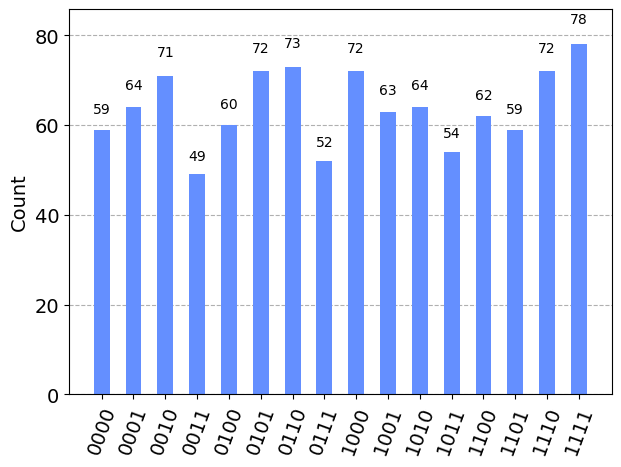

In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

def qft(circuit, n):
    for j in range(n):
        circuit.h(j)
        for k in range(j+1, n):
            circuit.cp(2*np.pi/2**(k-j+1), k, j)

# Example usage
n_qubits = 4
qc = QuantumCircuit(n_qubits)

# Apply QFT to the first n_qubits
qft(qc, n_qubits)

# Measure the qubits
qc.measure_all()

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, simulator)
qobj = assemble(tqc)
result = simulator.run(qobj).result()

# Display the result
counts = result.get_counts()
plot_histogram(counts)


# Shor's Algorithm: Shor's algorithm is a quantum algorithm for integer factorization, which has the potential to efficiently factor large numbers, threatening classical public-key cryptography.

Shor's Algorithm is a quantum algorithm developed by mathematician Peter Shor in 1994. It is designed to efficiently factorize large composite numbers into their prime factors. The potential impact of Shor's Algorithm on classical public-key cryptography is significant, as many widely-used cryptographic protocols, such as RSA, rely on the difficulty of factoring large numbers for their security.

Here's an overview of Shor's Algorithm, along with some of the key equations and information:

1. **Problem Being Addressed:**
   - The algorithm primarily addresses the integer factorization problem, which involves finding the prime factors of a composite integer.

2. **Quantum Fourier Transform (QFT):**
   - Shor's Algorithm heavily relies on the Quantum Fourier Transform. The QFT is a quantum analog of the classical Fourier Transform and is essential for efficiently solving the period-finding problem, a key step in the algorithm.

3. **Period-Finding:**
   - The algorithm leverages the periodicity inherent in certain mathematical functions. The ability to efficiently find the period of a function on a quantum computer is crucial for its success.

4. **Equations:**
   - **Shor's Algorithm for Factoring:**
     - The quantum part of Shor's Algorithm can be summarized by the following equation:
     \[ a^{r/2} \equiv -1 \pmod{N}, \]
     where \(a\) is a randomly chosen integer coprime to \(N\), and \(r\) is the period of \(a^x \mod N\).

5. **Steps of Shor's Algorithm:**
   - **Step 1: Choose \(a\):** Randomly select an integer \(a\) such that \(1 < a < N\) and \(a\) is coprime to \(N\).
   - **Step 2: Find Period \(r\):** Use quantum algorithms to efficiently find the period \(r\) of \(a^x \mod N\).
   - **Step 3: Factorization:** If \(r\) is even and \(a^{r/2} \not\equiv -1 \pmod{N}\), then the factors of \(N\) can be computed using greatest common divisor (GCD) operations.

6. **Security Implications:**
   - Shor's Algorithm poses a threat to widely-used public-key cryptosystems, such as RSA, which relies on the difficulty of factoring the product of two large prime numbers for its security.

7. **Quantum Computers Required:**
   - Shor's Algorithm is specifically designed to run on a quantum computer. It takes advantage of quantum parallelism and the ability of qubits to exist in multiple states simultaneously.

8. **Current State:**
   - As of my last knowledge update in January 2022, practical quantum computers with a sufficient number of stable qubits are still in the early stages of development. Shor's Algorithm's impact on cryptography is a driving force for the development of post-quantum cryptographic algorithms that are resistant to quantum attacks.

It's important to note that the details and progress in quantum computing may have evolved since my last update. Always refer to the latest literature for the most current information.

In [3]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import matplotlib.pyplot as plt

a = 234

# Function to apply modular exponentiation
def c_amod15(a, power):
    U = QuantumCircuit(4, name='U')
    for iteration in range(power):
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
        U.x(0)
        U.cx(1, 2)
        U.cx(2, 3)
        U.cx(3, 0)
        U.swap(0, 1)
    U = U.to_gate()
    U.name = "a^%i mod 15" % power
    c_U = U.control()
    return c_U

# Quantum part of Shor's Algorithm
def shor_quantum_algorithm(N):
    # Step 1: Choose a random integer 'a' such that 1 < a < N
    a = randint(2, N)
    
    # Step 2: Find the order (period) using quantum circuits
    period_found = False
    while not period_found:
        power = 1
        while power < N:
            period = find_period(a, power)
            
            # Check if the period is even and a^(period/2) is not equal to -1 (mod N)
            if period % 2 == 0 and (a**(period/2)) % N != -1:
                period_found = True
                break
            
            power *= 2
    
    return period

# Helper function to find the period using quantum circuits
def find_period(a, power):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):  # initialize counting qubits in state |+>
        qc.h(q)
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count):  # Do controlled-U operations
        qc.append(c_amod15(a, power), 
                 [q] + [i+n_count for i in range(4)])
    qc.measure([i for i in range(n_count)], [i for i in range(n_count)])
    
    # Simulate the quantum circuit
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, aer_sim)
    qobj = assemble(transpiled_qc)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts(qc)
    
    # Use continued fractions to find the period
    for measured_value in counts:
        measured_value = measured_value[::-1]  # reverse the measured string
        print(f"Measured value: {measured_value}")
        
        # Convert the binary string to decimal
        measured_value_decimal = int(measured_value, 2)
        
        # Use continued fractions to find the period
        fractions = []
        for i in range(1, n_count+1):
            fraction = gcd(measured_value_decimal, 2**i)
            if fraction > 1:
                fractions.append(fraction)
        
        if fractions:
            print(f"Found fractions: {fractions}")
            period = fractions[0]
            break
    
    return period

# Example: Factorizing a number (e.g., 15)
N = 15
measured_period = shor_quantum_algorithm(N)

# Classical post-processing to find factors
guesses = [gcd(a**(measured_period//2) - 1, N), gcd(a**(measured_period//2) + 1, N)]
factors = [factor for factor in guesses if factor > 1][0]

print(f"Original number (N): {N}")
print(f"Measured period: {measured_period}")
print(f"Factors found: {factors}")


Measured value: 00100000
Found fractions: [2, 4, 8, 16, 32, 32, 32, 32]
Original number (N): 15
Measured period: 2
Factors found: 5


C:\Users\yashr\AppData\Local\Temp\ipykernel_2844\1995632714.py:63: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(qobj).result()


# Grover's Algorithm: 

Grover's algorithm is a quantum search algorithm that can provide a quadratic speedup over classical algorithms for unstructured databases

# Grover's Algorithm: Quantum Search Algorithm

## Overview:

Grover's algorithm, proposed by Lov Grover in 1996, is a quantum algorithm designed for searching an unsorted database. It provides a quadratic speedup over classical algorithms for unstructured search problems.

## Problem Statement:

Consider an unsorted database with \(N\) items, where only one item is marked as the solution. The goal is to find the marked item using as few queries as possible.

## Algorithm Steps:

1. **Initialization:**
   - Prepare a quantum superposition of all possible states using Hadamard gates.

   \[ |s\rangle = H^{\otimes n} |0\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle \]

2. **Oracle (Marking the Solution):**
   - Apply an oracle that flips the sign of the amplitude of the solution state.

   \[ U_f |x\rangle = (-1)^{f(x)} |x\rangle \]

   The oracle \(U_f\) marks the solution state by inverting its amplitude.

3. **Amplitude Amplification:**
   - Apply the Grover diffusion operator, which involves two steps:
     - **Inversion About the Mean (Diffusion):** Amplify the amplitude of the average state.
     - **Amplitude Inversion:** Amplify the amplitude of the solution state.

   \[ U_s = 2|s\rangle \langle s| - I \]

4. **Iterative Process:**
   - Iteratively apply the oracle and amplitude amplification for approximately \(\sqrt{N}\) times.

## Equations:

1. **Grover Diffusion Operator:**
   \[ U_s = 2|s\rangle \langle s| - I \]
   where \(|s\rangle\) is the equal superposition state.

2. **Number of Iterations (\(R\)):**
   \[ R \approx \frac{\pi}{4} \sqrt{\frac{N}{M}} \]
   where \(M\) is the number of solutions.

## Overall Probability of Measuring the Solution:

After \(R\) iterations, the probability of measuring the solution state approaches 1.

\[ P(\text{measuring solution}) \approx 1 - \frac{1}{\sqrt{N}} \]

## Applications:

Grover's algorithm has applications in various fields, including optimization problems, database search, and cryptographic protocols.

## Limitations:

1. **No Exponential Speedup:**
   - Grover's algorithm provides a quadratic speedup, not an exponential one.
   - It cannot solve problems for which no classical algorithm can achieve better than a quadratic speedup.

2. **Oracle Requirement:**
   - The algorithm assumes access to an oracle that marks the solution state.
   - In practical scenarios, designing efficient oracles might be challenging.

## Python Implementation:

Below is a simple Python code using Qiskit to implement Grover's algorithm:

```python
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def grover_algorithm(oracle, n):
    qc = QuantumCircuit(n, n-1)

    # Step 1: Apply Hadamard gates to create a superposition
    qc.h(range(n))

    # Step 2: Iteratively apply the oracle and Grover diffusion operator
    for _ in range(int((3.14 / 4) * (2 ** (n/2)))):
        qc.append(oracle, range(n))
        qc.h(range(n))
        qc.x(range(n))
        qc.h(n-1)
        qc.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate
        qc.h(n-1)
        qc.x(range(n))
        qc.h(range(n))

    # Step 3: Measure all qubits
    qc.measure(range(n-1), range(n-1))

    return qc

# Example usage:
oracle_circuit = QuantumCircuit(3, name="oracle")
oracle_circuit.x(2)  # Marking the solution state |110>

grover_circuit = grover_algorithm(oracle_circuit, 3)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(assemble(compiled_circuit)).result()

# Visualize the results
counts = result.get_counts(grover_circuit)
plot_histogram(counts)
```

This code demonstrates the implementation of Grover's algorithm for a 3-qubit search problem with a marked solution state. Adjustments can be made based on the specific problem you want to solve.

C:\Users\yashr\AppData\Local\Temp\ipykernel_2844\3402564401.py:16: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate
C:\Users\yashr\AppData\Local\Temp\ipykernel_2844\3402564401.py:35: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


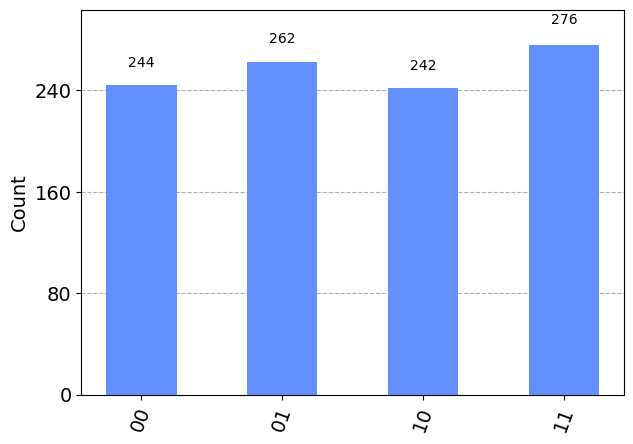

In [4]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def grover_algorithm(oracle, n):
    qc = QuantumCircuit(n, n-1)

    # Step 1: Apply Hadamard gates to create a superposition
    qc.h(range(n))

    # Step 2: Iteratively apply the oracle and Grover diffusion operator
    for _ in range(int((3.14 / 4) * (2 ** (n/2)))):
        qc.append(oracle, range(n))
        qc.h(range(n))
        qc.x(range(n))
        qc.h(n-1)
        qc.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate
        qc.h(n-1)
        qc.x(range(n))
        qc.h(range(n))

    # Step 3: Measure all qubits
    qc.measure(range(n-1), range(n-1))

    return qc

# Example usage:
oracle_circuit = QuantumCircuit(3, name="oracle")
oracle_circuit.x(2)  # Marking the solution state |110>

grover_circuit = grover_algorithm(oracle_circuit, 3)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(assemble(compiled_circuit)).result()

# Visualize the results
counts = result.get_counts(grover_circuit)
plot_histogram(counts)

In [6]:
counts = result.get_counts(grover_circuit)
counts

{'11': 276, '01': 262, '00': 244, '10': 242}

C:\Users\yashr\AppData\Local\Temp\ipykernel_2844\1513739470.py:20: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate
C:\Users\yashr\AppData\Local\Temp\ipykernel_2844\1513739470.py:40: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


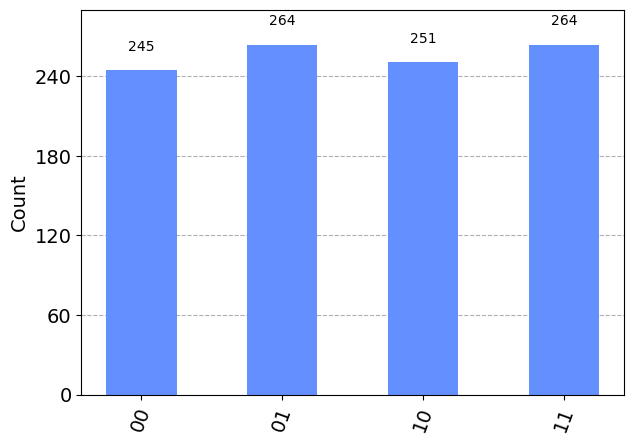

In [7]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def grover_circuit(oracle, n):
    # Create a quantum circuit with n qubits and n-1 classical bits
    qc = QuantumCircuit(n, n-1)

    # Apply Hadamard gates to create an equal superposition
    qc.h(range(n))

    # Number of Grover iterations (optimal for 3 qubits)
    num_iterations = int((3.14 / 4) * (2 ** (n/2)))

    # Grover's algorithm iterations
    for _ in range(num_iterations):
        qc.append(oracle, range(n))
        qc.h(range(n))
        qc.x(range(n))
        qc.h(n-1)
        qc.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate
        qc.h(n-1)
        qc.x(range(n))
        qc.h(range(n))

    # Measure qubits
    qc.measure(range(n-1), range(n-1))

    return qc

# Oracle to mark the solution state (e.g., |110>)
oracle_circuit = QuantumCircuit(3, name="oracle")
oracle_circuit.x(2)  # Marking the solution state |110>

# Apply Grover's algorithm
grover_circ = grover_circuit(oracle_circuit, 3)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circ, simulator)
result = simulator.run(assemble(compiled_circuit)).result()

# Visualize the results
counts = result.get_counts(grover_circ)
plot_histogram(counts)


# Quantum Amplitude Amplification: 

A general technique used in quantum algorithms, such as Grover's algorithm, to amplify the amplitude of the correct solution and improve the probability of finding the solution upon measurement.

Quantum Amplitude Amplification is a technique used in quantum algorithms to enhance the probability of measuring the correct solution. It is prominently featured in algorithms like Grover's algorithm, designed to search an unsorted database or solve certain types of computational problems more efficiently than classical algorithms. Below is an explanation of Quantum Amplitude Amplification, including key concepts, equations, and information in the context of quantum computing.

### 1. Basic Concepts:

#### a. Oracle Function:
   - In the context of Grover's algorithm, the problem is often framed as searching for a marked item in an unsorted database.
   - An oracle function, \(U_f\), is introduced to mark the solution by negating the amplitude of the solution state.

#### b. Amplitude Amplification:
   - Quantum Amplitude Amplification aims to amplify the amplitude of the marked state to improve the probability of measuring the correct solution.
   - It involves the application of two main operations: the Grover Diffusion Operator (Grover's operator) and the Oracle Operator.

### 2. Key Equations:

#### a. Grover Diffusion Operator (Grover's Operator):
   - The Grover Diffusion Operator \(D\) acts on the equal superposition state \(|s\rangle\) to enhance the amplitude of the marked state:
   
   \[ D = 2|s\rangle\langle s| - I \]

   where \(|s\rangle\) is the equal superposition state and \(I\) is the identity matrix.

#### b. Oracle Operator:
   - The Oracle Operator \(U_f\) marks the solution state by negating its amplitude:

   \[ U_f = I - 2|s_f\rangle\langle s_f| \]

   where \(|s_f\rangle\) is the solution state.

#### c. Amplitude Amplification:
   - The process of amplitude amplification involves alternating the application of the Oracle Operator and the Grover Diffusion Operator.
   - After \(k\) iterations, the amplitude of the marked state is amplified, increasing the likelihood of measuring the correct solution.

   \[ |\psi_k\rangle = (U_f D)^k |\psi_0\rangle \]

### 3. Quantum Circuit Implementation:

```python
from qiskit import QuantumCircuit, Aer, transpile, assemble

def grover_circuit(oracle, n):
    # Create a quantum circuit with n qubits
    qc = QuantumCircuit(n, n)
    
    # Apply Hadamard gates to create an equal superposition state
    qc.h(range(n))

    # Define the number of iterations for amplitude amplification
    num_iterations = int((np.pi/4) * np.sqrt(2**n))
    
    # Apply Grover iterations
    for _ in range(num_iterations):
        qc.append(oracle, range(n))  # Apply the oracle
        qc.h(range(n))
        qc.x(range(n))
        qc.h(n-1)
        qc.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate
        qc.h(n-1)
        qc.x(range(n))
        qc.h(range(n))

    # Measure the qubits
    qc.measure(range(n), range(n))
    
    return qc

# Example usage
oracle = QuantumCircuit(3, name='oracle')
oracle.cz(0, 2)  # Controlled-Z gate to mark the state 010
grover_circuit_example = grover_circuit(oracle, 3)
```

### 4. Information:

#### a. Iteration Count:
   - The number of iterations needed for optimal amplitude amplification is approximately \(\frac{\pi}{4} \sqrt{N}\), where \(N\) is the size of the search space.

#### b. Probability of Success:
   - The probability of measuring the correct solution after \(k\) iterations is approximately \(1 - \frac{1}{\sqrt{N}}\).

#### c. Optimality:
   - Grover's algorithm provides a quadratic speedup over classical algorithms for unstructured search problems.

#### d. Applications:
   - Grover's algorithm is applicable to various problems, including database search, Boolean satisfiability, and more.

Quantum Amplitude Amplification is a powerful concept that significantly contributes to the efficiency of quantum algorithms like Grover's algorithm. Its ability to amplify the probability of finding the correct solution makes it a key technique in quantum computing.

Grover's Circuit:
     ┌───┐┌─────────┐┌───┐┌───┐          ┌───┐┌───┐     ┌─────────┐┌───┐┌───┐»
q_0: ┤ H ├┤0        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤0        ├┤ H ├┤ X ├»
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤     │         │├───┤├───┤»
q_1: ┤ H ├┤1 oracle ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤1 oracle ├┤ H ├┤ X ├»
     ├───┤│         │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐│         │├───┤├───┤»
q_2: ┤ H ├┤2        ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤2        ├┤ H ├┤ X ├»
     └───┘└─────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└─────────┘└───┘└───┘»
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«               ┌───┐┌───┐     ┌─┐      
«q_0: ───────■──┤ X ├┤ H ├─────┤M├──────
«            │  ├───┤├───┤     └╥┘┌─┐   
«q_1: ───────■──┤ X ├┤ H ├──────╫─┤M├───
«     ┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
«q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
«     └───┘└───┘└───┘└───

C:\Users\yashr\AppData\Local\Temp\ipykernel_9128\2029094671.py:19: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  grover_circuit.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate


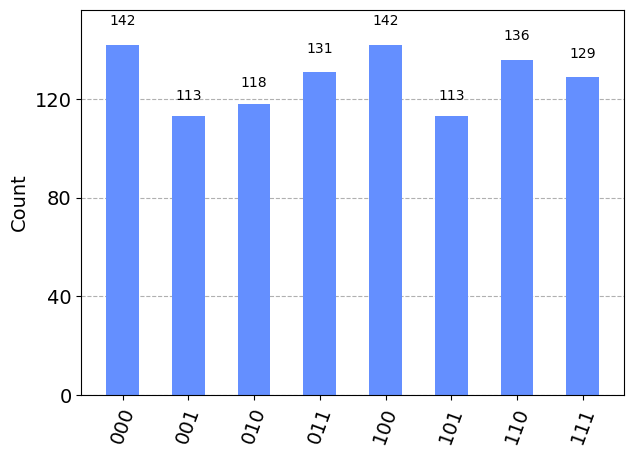

In [3]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def grover_amplitude_amplification(oracle, grover_iterations):
    n = oracle.num_qubits

    # Initialize quantum circuit
    grover_circuit = QuantumCircuit(n, n)

    # Apply Hadamard gates to create an equal superposition state
    grover_circuit.h(range(n))

    # Grover's iterations
    for _ in range(grover_iterations):
        grover_circuit.append(oracle, range(n))
        grover_circuit.h(range(n))
        grover_circuit.x(range(n))
        grover_circuit.h(n-1)
        grover_circuit.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate
        grover_circuit.h(n-1)
        grover_circuit.x(range(n))
        grover_circuit.h(range(n))

    # Measure the qubits
    grover_circuit.measure(range(n), range(n))

    return grover_circuit

# Example usage
oracle_circuit = QuantumCircuit(3, name='oracle')
oracle_circuit.cz(0, 2)  # Controlled-Z gate to mark the state 010

# Set the number of Grover's iterations
iterations = 2

# Create the Grover circuit
grover_circuit = grover_amplitude_amplification(oracle_circuit, iterations)

# Visualize the circuit
print("Grover's Circuit:")
print(grover_circuit)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(transpile(grover_circuit, simulator)).result()

# Plot the results
counts = result.get_counts(grover_circuit)
plot_histogram(counts)


# Quantum Phase Estimation: 

Quantum phase estimation is a quantum algorithm for estimating the eigenvalues of a unitary operator, and it is a crucial subroutine in various quantum algorithms

Quantum Phase Estimation (QPE) is a quantum algorithm designed to estimate the eigenvalues of a unitary operator. It plays a crucial role in various quantum algorithms, particularly in quantum computing algorithms for factoring large numbers (Shor's algorithm) and solving certain problems exponentially faster than the best-known classical algorithms.

### Basic Idea:
The primary goal of quantum phase estimation is to find the phase angle \(\theta\) in the eigenstate \(|\psi\rangle\) of a unitary operator \(U\) such that \(U|\psi\rangle = e^{2\pi i \theta}|\psi\rangle\).

The quantum phase estimation algorithm involves the following key steps:

1. **Initialization**: Prepare two quantum registers. The first register (quantum) contains \(n\) qubits initialized in the state \(|\psi\rangle\), and the second register (classical) contains \(m\) qubits initialized to \(|0\rangle\).

2. **Superposition**: Apply a series of Hadamard gates to the first register to create a superposition of all possible states.

3. **Unitary Operator Application**: Apply controlled unitary operations, \(CU^{2^j}\), where \(U\) is the unitary operator whose eigenvalues we want to estimate, and \(j\) ranges from \(0\) to \(m-1\).

4. **Inverse Quantum Fourier Transform (QFT)**: Apply the inverse quantum Fourier transform on the first register.

5. **Measurement**: Measure the first register, obtaining an estimate of the phase \(\theta\) in binary form.

### Mathematical Representation:

1. **Quantum State Initialization**:
   \[|\psi\rangle \otimes |0\rangle = \frac{1}{\sqrt{2^n}}\sum_{k=0}^{2^n-1}|k\rangle \otimes |0\rangle\]

2. **Controlled Unitary Operations**:
   \[CU^{2^j}|\psi\rangle \otimes |0\rangle = \frac{1}{\sqrt{2^n}}\sum_{k=0}^{2^n-1}e^{2\pi i \theta 2^j k}|k\rangle \otimes |0\rangle\]

3. **Inverse Quantum Fourier Transform**:
   \[QFT^{-1}\left(\frac{1}{\sqrt{2^n}}\sum_{k=0}^{2^n-1}e^{2\pi i \theta k}|k\rangle\right) = |2^n \theta\rangle\]

4. **Measurement**:
   \[|2^n \theta\rangle = |a_m a_{m-1} \ldots a_0\rangle\]
   The measured binary fraction \(0.a_ma_{m-1}\ldots a_0\) gives an estimate of the phase \(\theta\).

### Implementation:
Below is a simple Python code snippet using Qiskit to demonstrate Quantum Phase Estimation:

```python
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import pi

def qpe_circuit(unitary_operator, n, m):
    qc = QuantumCircuit(n + m, m)
    
    # Hadamard gates for superposition
    qc.h(range(n + m))
    
    # Apply controlled unitary operations
    for j in range(m):
        qc.append(unitary_operator.control(), range(j, j + n + 1))
    
    # Inverse Quantum Fourier Transform
    qc.swap(range(n // 2), range(n - 1, n // 2 - 1, -1))
    for j in range(n):
        qc.h(j)
        for k in range(j + 1, n):
            qc.cp(-pi / (2 ** (k - j)), k, j)
    
    # Measurement
    qc.measure(range(n), range(m))
    
    return qc

# Example: Quantum Phase Estimation for a 2x2 Hadamard gate
from qiskit.extensions import UnitaryGate

# Define a 2x2 Hadamard gate
hadamard_matrix = [[1, 1], [1, -1]]
hadamard_gate = UnitaryGate(hadamard_matrix)

# Create the Quantum Phase Estimation circuit
n_qubits = 3  # Number of qubits in the eigenstate register
precision = 2  # Number of qubits in the phase register
circuit = qpe_circuit(hadamard_gate, n_qubits, precision)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()

# Display the measurement results
counts = result.get_counts(circuit)
print("Measurement results:", counts)

# Plot the histogram of measurement results
plot_histogram(counts)
```

In this example, we estimate the phase corresponding to the eigenstate of a 2x2 Hadamard gate. The output of the simulation provides the binary fraction representing the estimated phase.

This is a simplified explanation, and Quantum Phase Estimation can be extended to estimate eigenvalues of more general unitary operators.

In [12]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, assemble, Aer
from qiskit.tools.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as plt

C:\Users\yashr\AppData\Local\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


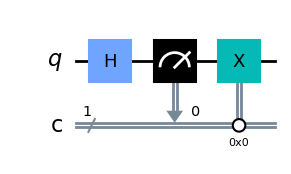

In [13]:
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q, c)
qc.h(0)
qc.measure(0,0)
qc.x(0).c_if(c, 0)
qc.draw(output='mpl')

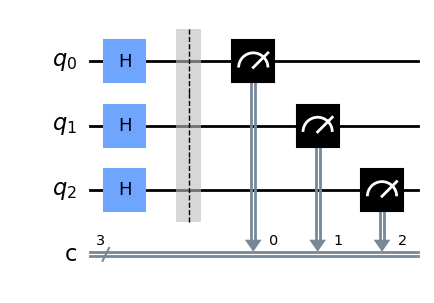

In [14]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.barrier()
qc.measure(q,c)
qc.draw('mpl')

In [15]:
print(bin(3))
print(bin(7))

0b11
0b111


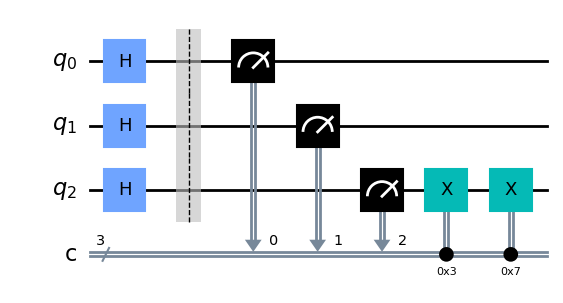

In [16]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')
qc = QuantumCircuit(q, c)
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()
qc.measure(q,c)

qc.x(2).c_if(c, 3) # for the 011 case
qc.x(2).c_if(c, 7) # for the 111 case

qc.draw(output='mpl')

In [17]:
nq = 2
m = 2
q = QuantumRegister(nq,'q')
c = ClassicalRegister(m,'c')

qc_S = QuantumCircuit(q,c)

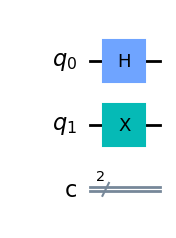

In [18]:
qc_S.h(0)
qc_S.x(1)
qc_S.draw('mpl')

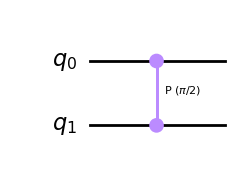

In [19]:
cu_circ = QuantumCircuit(2)
cu_circ.cp(pi/2,0,1)
cu_circ.draw('mpl')

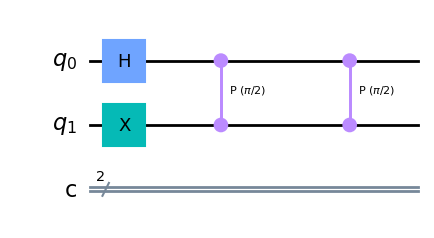

In [20]:
for _ in range(2**(m-1)):
    qc_S.cp(pi/2,0,1)
qc_S.draw('mpl')

In [21]:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)

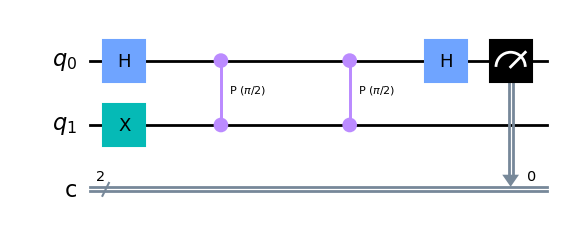

In [22]:
x_measurement(qc_S, q[0], c[0])
qc_S.draw('mpl')

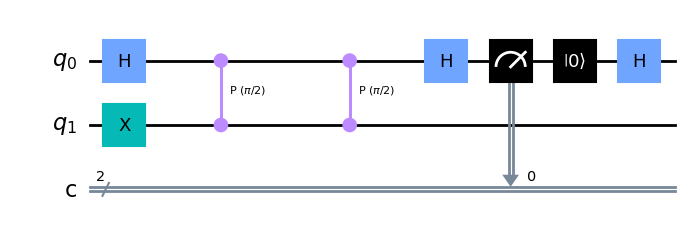

In [23]:
qc_S.reset(0)
qc_S.h(0)
qc_S.draw('mpl')

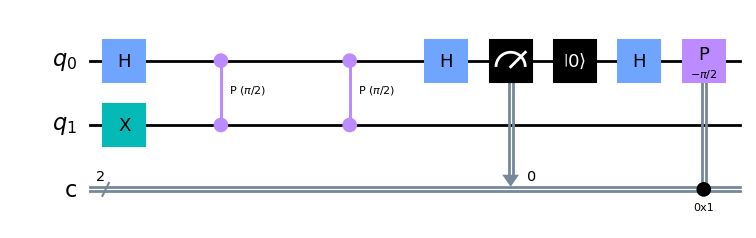

In [24]:
qc_S.p(-pi/2,0).c_if(c,1)
qc_S.draw('mpl')

In [25]:
## 2^t c-U operations (with t=m-2)
for _ in range(2**(m-2)):
    qc_S.cp(pi/2,0,1)

x_measurement(qc_S, q[0], c[1])

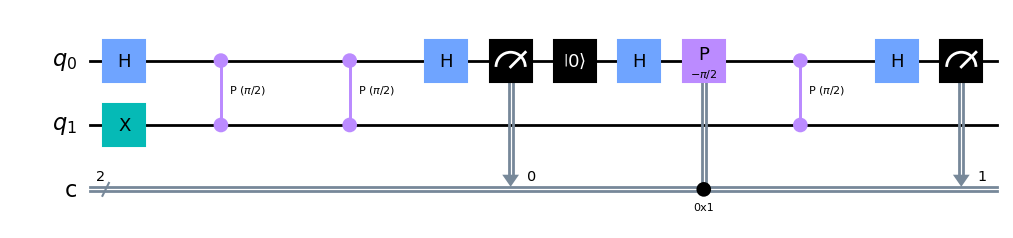

In [26]:
qc_S.draw('mpl')

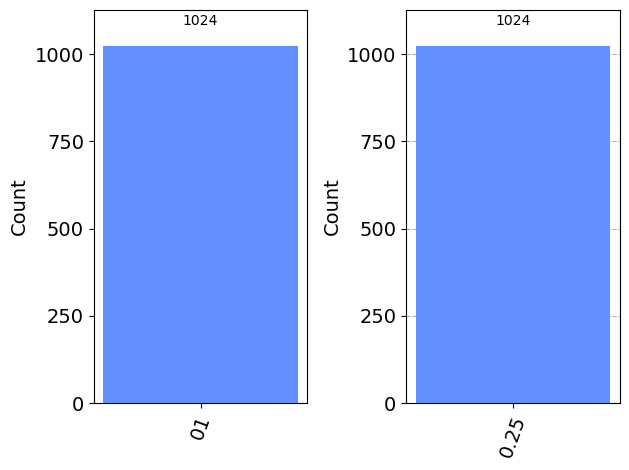

In [27]:
sim = Aer.get_backend('qasm_simulator')
count0 = execute(qc_S, sim).result().get_counts()

key_new = [str(int(key,2)/2**m) for key in list(count0.keys())]
count1 = dict(zip(key_new, count0.values()))

fig, ax = plt.subplots(1,2)
plot_histogram(count0, ax=ax[0])
plot_histogram(count1, ax=ax[1])
plt.tight_layout()

In [28]:
nq = 3    # number of qubits
m = 3    # number of classical bits
q = QuantumRegister(nq,'q')
c = ClassicalRegister(m,'c')

qc = QuantumCircuit(q,c)

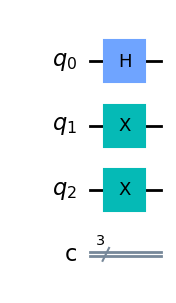

In [29]:
qc.h(0)
qc.x([1,2])
qc.draw('mpl')

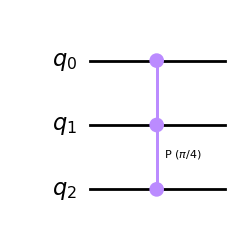

In [30]:
cu_circ = QuantumCircuit(nq)
cu_circ.mcp(pi/4,[0,1],2)
cu_circ.draw('mpl')

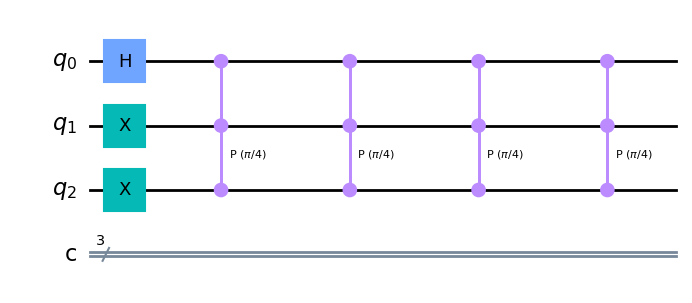

In [31]:
for _ in range(2**(m-1)):
    qc.mcp(pi/4,[0,1],2)
qc.draw('mpl')

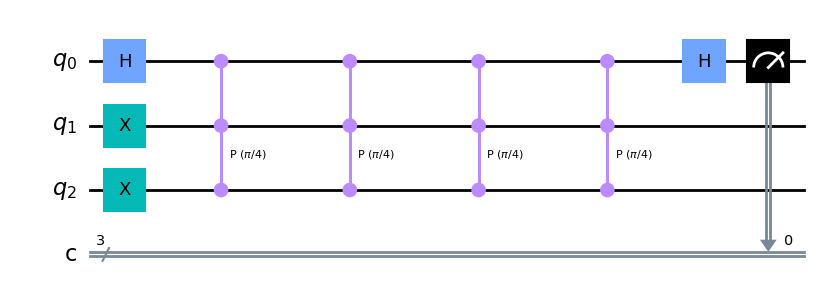

In [32]:
x_measurement(qc, q[0], c[0])
qc.draw('mpl')

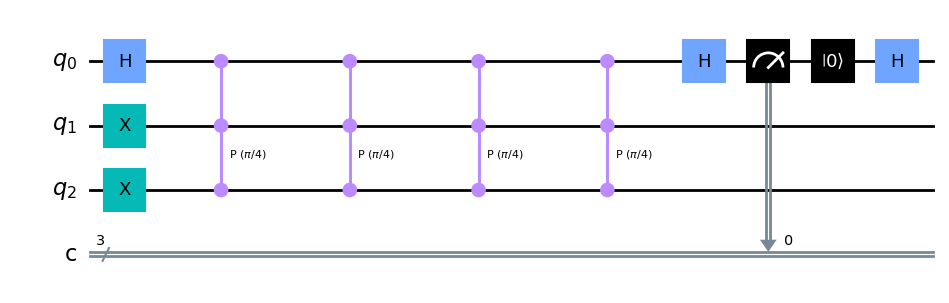

In [33]:
qc.reset(0)
qc.h(0)
qc.draw('mpl')

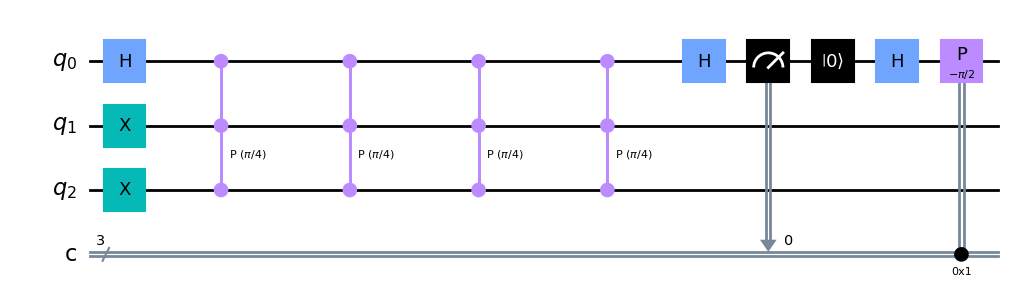

In [34]:
qc.p(-pi/2,0).c_if(c,1)
qc.draw('mpl')

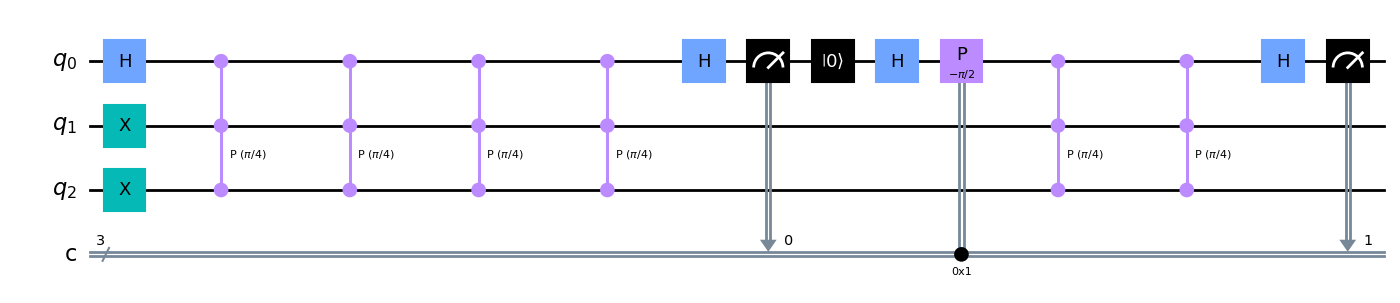

In [35]:
for _ in range(2**(m-2)):
    qc.mcp(pi/4,[0,1],2)
x_measurement(qc, q[0], c[1])
qc.draw('mpl')

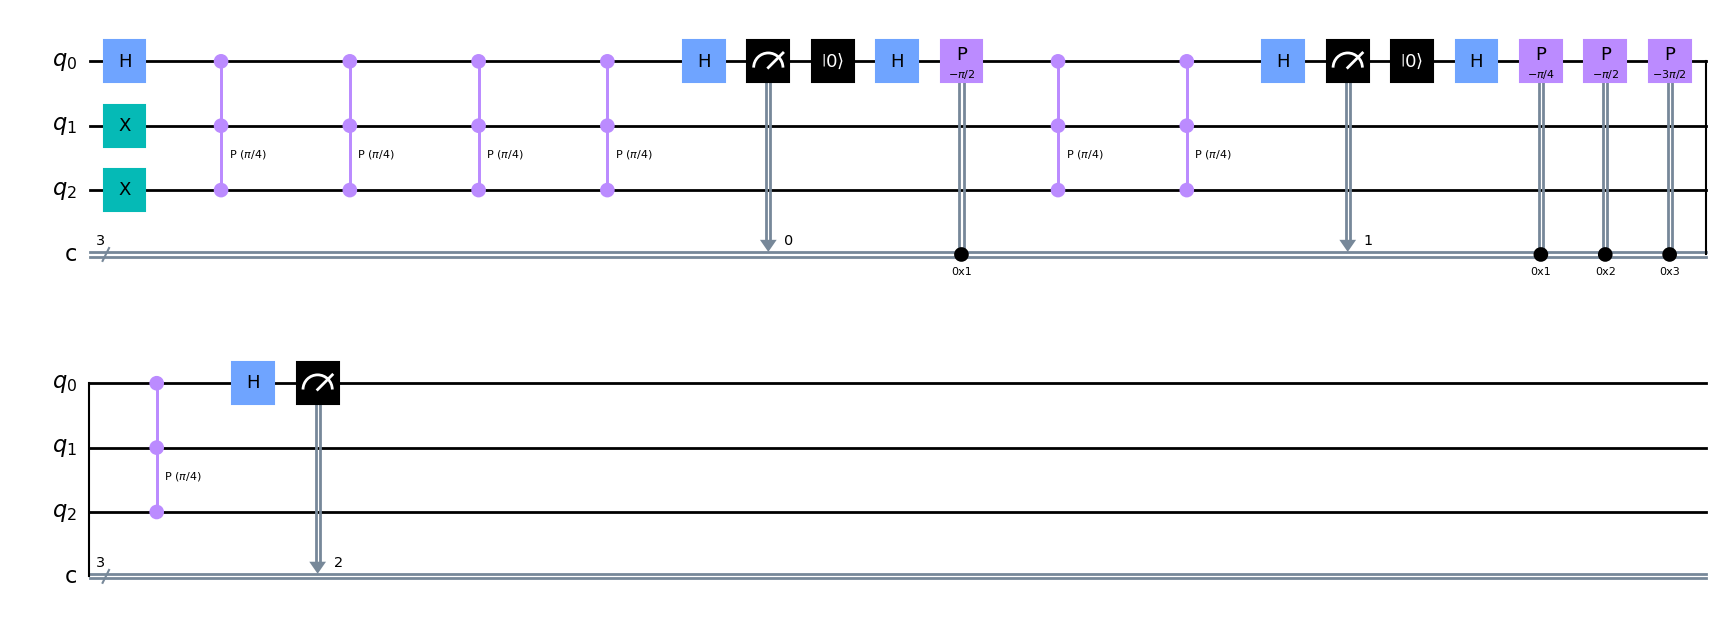

In [36]:
# initialization of qubit q0
qc.reset(0)
qc.h(0)

# phase correction
qc.p(-pi/4,0).c_if(c,1)

qc.p(-pi/2,0).c_if(c,2)
qc.p(-3*pi/2,0).c_if(c,3)

# c-U operations
for _ in range(2**(m-3)):
    qc.mcp(pi/4,[0,1],2)

# X measurement
qc.h(0)
qc.measure(0,2)

qc.draw('mpl')

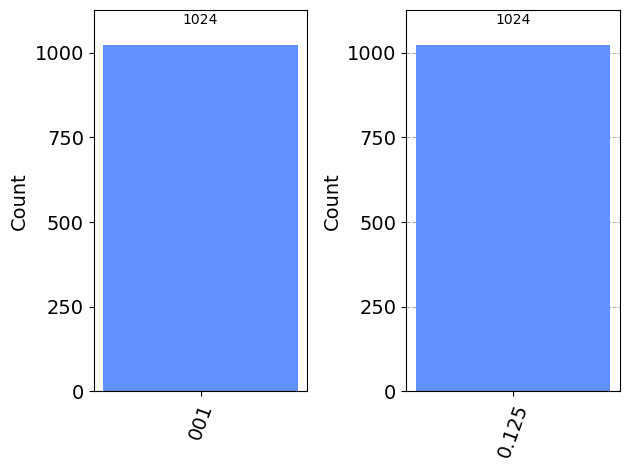

In [37]:
count0 = execute(qc, sim).result().get_counts()

key_new = [str(int(key,2)/2**m) for key in list(count0.keys())]
count1 = dict(zip(key_new, count0.values()))

fig, ax = plt.subplots(1,2)
plot_histogram(count0, ax=ax[0])
plot_histogram(count1, ax=ax[1])
fig.tight_layout()

In [38]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

# Quantum Oracle: 

In quantum algorithms, an oracle is a black-box subroutine that implements specific functions and provides information to the quantum algorithm through quantum queries.

In quantum computing, an oracle is a crucial concept used in quantum algorithms, particularly in the context of quantum query complexity. An oracle is essentially a black-box subroutine that implements a specific function and provides information to the quantum algorithm through quantum queries. The primary role of an oracle is to allow the quantum algorithm to access information about the problem it is trying to solve.

### Quantum Oracle Model:

In the quantum oracle model, an oracle is represented by a unitary operator \(U_f\) that acts on quantum states. The oracle operator \(U_f\) is designed to encode the information about the function \(f(x)\) that the algorithm is interested in. The oracle is often used in quantum algorithms to solve problems faster than classical algorithms in terms of query complexity.

### Oracle Query Operation:

The action of the oracle on a quantum state \(|\psi\rangle\) is defined as follows:

\[ U_f |\psi\rangle |x\rangle = (-1)^{f(x)}|\psi\rangle |x\rangle \]

Here, \(|x\rangle\) is an auxiliary register representing possible inputs to the function \(f(x)\), and \(f(x)\) is a binary function that yields either 0 or 1.

### Example - Deutsch's Algorithm:

A famous example illustrating the use of a quantum oracle is Deutsch's algorithm, which solves a specific type of problem faster than classical algorithms. In Deutsch's algorithm, the function \(f(x)\) is a binary function that takes a single bit as input and produces a single bit as output.

The oracle \(U_f\) for Deutsch's algorithm is designed as follows:

\[ U_f |x\rangle |y\rangle = |x\rangle |y \oplus f(x)\rangle \]

where \(\oplus\) denotes bitwise XOR.

### Quantum Query Complexity:

The efficiency of a quantum algorithm often depends on the number of queries made to the oracle. The quantum query complexity is the minimum number of queries needed to solve a particular problem using a quantum algorithm.

The advantage of quantum algorithms often lies in their ability to exploit superposition and interference to obtain information about the function \(f(x)\) more efficiently than classical algorithms.

### Quantum Oracle in Grover's Algorithm:

Another prominent example of a quantum algorithm that uses an oracle is Grover's algorithm. Grover's algorithm is designed to search an unsorted database and find the location of a marked item with a quadratic speedup compared to classical algorithms.

In Grover's algorithm, the oracle \(U_f\) marks the states corresponding to the solution. The action of the oracle is designed to amplify the amplitude of the marked state, allowing for a more efficient search.

### Conclusion:

In summary, quantum oracles play a crucial role in quantum algorithms by providing a mechanism for quantum algorithms to access classical information in a way that takes advantage of quantum parallelism and interference. The use of oracles allows quantum algorithms to outperform classical algorithms in certain computational tasks.

Results for Deutsch's algorithm with constant oracle:


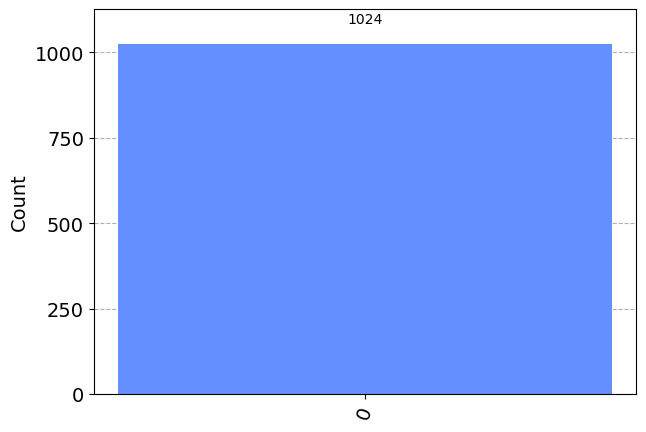

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def deutsch_oracle(n, type_of_oracle):
    """
    Creates a quantum oracle for Deutsch's algorithm.

    Parameters:
    - n: Number of qubits in the input register.
    - type_of_oracle: Type of oracle, 'constant' or 'balanced'.

    Returns:
    - QuantumCircuit: Quantum circuit representing the oracle.
    """
    oracle_circuit = QuantumCircuit(n + 1, name='oracle')

    if type_of_oracle == 'constant':
        # Constant oracle, f(x) = 0 for all x
        pass  # No operation needed for a constant oracle

    elif type_of_oracle == 'balanced':
        # Balanced oracle, f(x) is constant except for one x where f(x) = 1
        oracle_circuit.x(n)  # Flip the target qubit
    else:
        raise ValueError("Invalid type_of_oracle. Use 'constant' or 'balanced'.")

    oracle_gate = oracle_circuit.to_gate()
    oracle_gate.name = 'Oracle'  # Set the gate name

    return oracle_circuit

def deutsch_algorithm(type_of_oracle):
    """
    Implements Deutsch's algorithm using Qiskit.

    Parameters:
    - type_of_oracle: Type of oracle, 'constant' or 'balanced'.

    Returns:
    - QuantumCircuit: Quantum circuit for Deutsch's algorithm.
    """
    n = 1  # Number of qubits in the input register

    # Initialize the quantum circuit
    deutsch_circuit = QuantumCircuit(n + 1, n)

    # Apply Hadamard gate to all qubits
    deutsch_circuit.h(range(n + 1))

    # Apply the quantum oracle
    deutsch_circuit.append(deutsch_oracle(n, type_of_oracle), range(n + 1))

    # Apply Hadamard gate to the input qubits
    deutsch_circuit.h(range(n))

    # Measure the input qubits
    deutsch_circuit.measure(range(n), range(n))

    return deutsch_circuit

# Example usage for a constant oracle
type_of_oracle = 'constant'
circuit = deutsch_algorithm(type_of_oracle)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Display the results
counts = result.get_counts()
print(f"Results for Deutsch's algorithm with {type_of_oracle} oracle:")
plot_histogram(counts)


In [6]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

def create_quantum_oracle(n, oracle_function):
    """
    Creates a quantum oracle circuit for a given function.

    Parameters:
    - n: The number of qubits in the input space.
    - oracle_function: A function that takes a binary string of length n as input and returns True or False.

    Returns:
    - QuantumCircuit: The quantum circuit representing the oracle.
    """

    oracle_circuit = QuantumCircuit(n + 1, name="oracle")

    # Apply X gate to the last qubit (ancilla qubit) to prepare it in the |1⟩ state
    oracle_circuit.x(n)

    # Apply H gates to all qubits
    oracle_circuit.h(range(n + 1))

    # Call the oracle function to mark the correct solution(s)
    oracle_function(oracle_circuit, n)

    # Apply H gates again to all qubits
    oracle_circuit.h(range(n + 1))

    # Return the oracle circuit
    return oracle_circuit

def example_oracle_function(oracle_circuit, n):
    """
    Example oracle function to mark a specific solution.

    Parameters:
    - oracle_circuit: The quantum circuit representing the oracle.
    - n: The number of qubits in the input space.
    """

    # Example: Mark the solution |101⟩
    solution = '101'

    for i, bit in enumerate(reversed(solution)):
        if bit == '1':
            oracle_circuit.cx(i, n)

# Example usage
n_qubits = 3
oracle_circuit = create_quantum_oracle(n_qubits, example_oracle_function)

# Visualize the oracle circuit
print(oracle_circuit)

# Simulate the oracle circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(oracle_circuit, simulator)
result = simulator.run(compiled_circuit).result()

# Print the simulation results
#print(result.get_counts(compiled_circuit))


     ┌───┐          ┌───┐     
q_0: ┤ H ├───────■──┤ H ├─────
     ├───┤┌───┐  │  └───┘     
q_1: ┤ H ├┤ H ├──┼────────────
     ├───┤└───┘  │       ┌───┐
q_2: ┤ H ├───────┼────■──┤ H ├
     ├───┤┌───┐┌─┴─┐┌─┴─┐├───┤
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘


In [7]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

def oracle_query(circuit, marked_state):
    """
    Applies an oracle query operation to mark a specific state.

    Parameters:
    - circuit: The quantum circuit to which the oracle query operation is applied.
    - marked_state: The binary string representing the marked state.
    """

    n = circuit.num_qubits - 1  # Number of qubits excluding the ancilla qubit

    for i, bit in enumerate(reversed(marked_state)):
        if bit == '1':
            circuit.cx(i, n)

# Example usage
n_qubits = 3
quantum_circuit = QuantumCircuit(n_qubits + 1)  # One additional qubit for the ancilla

# Apply Hadamard gates to all qubits
quantum_circuit.h(range(n_qubits + 1))

# Apply the oracle query operation to mark the state |101⟩
oracle_query(quantum_circuit, '101')

# Apply Hadamard gates again to all qubits
quantum_circuit.h(range(n_qubits + 1))

# Measure all qubits
quantum_circuit.measure_all()

# Visualize the quantum circuit
print(quantum_circuit)

# Simulate the quantum circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(quantum_circuit, simulator)
result = simulator.run(compiled_circuit).result()

# Print the simulation results
print(result.get_counts(compiled_circuit))


        ┌───┐     ┌───┐      ░ ┌─┐         
   q_0: ┤ H ├──■──┤ H ├──────░─┤M├─────────
        ├───┤  │  ├───┤      ░ └╥┘┌─┐      
   q_1: ┤ H ├──┼──┤ H ├──────░──╫─┤M├──────
        ├───┤  │  └───┘┌───┐ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├──┼────■──┤ H ├─░──╫──╫─┤M├───
        ├───┤┌─┴─┐┌─┴─┐├───┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤ X ├┤ X ├┤ H ├─░──╫──╫──╫─┤M├
        └───┘└───┘└───┘└───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 
{'0000': 1024}


# Quantum Speedup: 

The concept that certain quantum algorithms can solve specific problems faster than their best-known classical counterparts, providing a potential advantage in terms of computation time.

Quantum speedup refers to the phenomenon where certain quantum algorithms can solve specific problems faster than the best-known classical algorithms for those problems. This advantage arises from the unique properties of quantum mechanics, such as superposition and entanglement. Below, I'll provide an overview of key concepts related to quantum speedup and highlight some quantum algorithms that demonstrate this phenomenon.

### Key Concepts:

1. **Superposition:**
   - In classical computing, bits can exist in one of two states: 0 or 1.
   - In quantum computing, qubits can exist in a superposition of both 0 and 1 simultaneously.

2. **Entanglement:**
   - Qubits can become entangled, meaning the state of one qubit is directly related to the state of another, even if they are physically separated.

3. **Quantum Parallelism:**
   - Quantum algorithms leverage superposition to process multiple possibilities simultaneously, providing a potential exponential speedup over classical algorithms.

4. **Quantum Gates:**
   - Quantum computations are performed using quantum gates, which manipulate qubits' states.
   - Notable gates include Hadamard gate (H), CNOT gate (controlled NOT), and phase shift gate.

5. **Quantum Fourier Transform (QFT):**
   - QFT is a quantum analogue of the classical Fourier transform.
   - It's a fundamental component in many quantum algorithms, including Shor's algorithm.

### Notable Quantum Algorithms Demonstrating Speedup:

1. **Shor's Algorithm:**
   - **Problem Solved:** Integer factorization (finding prime factors of a composite number).
   - **Classical Complexity:** Exponential (best-known classical algorithms).
   - **Quantum Complexity:** Polynomial (Shor's algorithm).
   - **Speedup:** Shor's algorithm can factorize large numbers exponentially faster than the best-known classical algorithms.

2. **Grover's Algorithm:**
   - **Problem Solved:** Unstructured search problem.
   - **Classical Complexity:** Quadratic (best-known classical algorithms).
   - **Quantum Complexity:** Square root of the classical time (Grover's algorithm).
   - **Speedup:** Grover's algorithm can search an unsorted database quadratically faster than the best-known classical algorithms.

### Quantum Speedup Equations:

1. **Quantum Speedup Factor (QSF):**
   - The ratio of the number of operations required by the best quantum algorithm to the number of operations required by the best classical algorithm.
   - \[ QSF = \frac{T_{\text{classical}}}{T_{\text{quantum}}} \]

2. **Amplitude Amplification (Grover's Algorithm):**
   - The number of iterations required by Grover's algorithm for an unstructured search is approximately \[ O\left(\sqrt{\frac{N}{M}}\right) \], where \(N\) is the size of the search space, and \(M\) is the number of solutions.

3. **Shor's Algorithm Time Complexity:**
   - The time complexity of Shor's algorithm for factoring an \(N\)-bit number is \[ O\left((\log N)^3\right) \].

### Considerations:

1. **Error Correction:**
   - Quantum computers are susceptible to errors, and error correction is a critical aspect of building practical quantum computers.

2. **Quantum Advantage:**
   - Quantum computers may not provide a speedup for all types of problems. The advantage is problem-specific.

3. **Hybrid Approaches:**
   - Hybrid quantum-classical algorithms may offer more practical solutions, combining the strengths of both classical and quantum computing.

4. **No-Cloning Theorem:**
   - Quantum states cannot be perfectly copied, limiting certain classical concepts in quantum computing.

In summary, quantum speedup is a promising aspect of quantum computing, with algorithms like Shor's and Grover's demonstrating the potential for exponential speedup in specific problem domains. However, practical challenges such as error correction and the development of fault-tolerant quantum computers must be addressed for quantum computing to fulfill its potential.

In [6]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
import numpy as np

# Function to create the Quantum Phase Estimation (QPE) circuit
def qpe_circuit(n, theta):
    qpe = QuantumCircuit(n + 1, n)

    # Apply Hadamard gate to the ancilla qubit
    qpe.h(n)

    # Apply controlled-U operations for the QPE algorithm
    for qubit in range(n):
        qpe.cp(theta, qubit, n)

    # Apply inverse Quantum Fourier Transform (QFT)
    qpe.swap(0, n)
    for j in range(n):
        for m in range(j):
            qpe.cp(-np.pi/float(2**(j-m)), m, j)
        qpe.h(j)

    return qpe

# Function to simulate the QPE circuit and extract the phase
def run_qpe(theta, n):
    qpe = qpe_circuit(n, theta)

    backend = Aer.get_backend('statevector_simulator')
    transpiled_qpe = transpile(qpe, backend)
    qobj = assemble(transpiled_qpe)
    result = execute(qpe, backend).result()
    statevector = result.get_statevector()

    # Extract the phase from the statevector
    phase = np.angle(statevector[np.argmax(np.abs(statevector))])

    # Map the phase to a binary fraction
    binary_fraction = phase / (2 * np.pi)
    measured_value = round(binary_fraction * (2 ** n))

    return measured_value / (2 ** n)

# Example usage
theta = 2 * np.pi * 0.35  # Example phase (change as needed)
n_qubits = 3  # Number of qubits for precision

#result = run_qpe(theta, n_qubits)
#print(f"Estimated phase: {result:.4f}")


In [7]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply a Hadamard gate to create a superposition
qc.h(0)

# Simulate the quantum circuit
backend = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, backend)
qobj = assemble(transpiled_qc)
result = execute(transpiled_qc, backend).result()
statevector = result.get_statevector()

# Display the result
print("Statevector after applying Hadamard gate:")
print(statevector)


Statevector after applying Hadamard gate:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [8]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate to entangle the two qubits
qc.cx(0, 1)

# Simulate the quantum circuit
backend = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, backend)
qobj = assemble(transpiled_qc)
result = execute(transpiled_qc, backend).result()
statevector = result.get_statevector()

# Display the result
print("Statevector after entanglement:")
print(statevector)


Statevector after entanglement:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [10]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Function to simulate the Deutsch-Jozsa algorithm
def run_deutsch_jozsa(oracle_type='balanced'):
    n = 3  # Number of qubits (adjust as needed)
    dj_circuit = deutsch_jozsa_circuit(n, oracle_type)

    backend = Aer.get_backend('qasm_simulator')
    transpiled_dj_circuit = transpile(dj_circuit, backend)
    qobj = assemble(transpiled_dj_circuit)
    result = execute(transpiled_dj_circuit, backend).result()

    # Check if counts dictionary is empty
    if 'counts' in result.to_dict():
        counts = result.get_counts()
        print(f"Result for {oracle_type} oracle: {counts}")
    else:
        print(f"No counts for experiment")

# Example usage
oracle_type = 'balanced'  # Change to 'constant' for a constant oracle
run_deutsch_jozsa(oracle_type)


No counts for experiment


C:\Users\yashr\AppData\Local\Temp\ipykernel_5904\663945350.py:20: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  dj_circuit.mct(list(range(n)), n)


In [11]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Create a quantum circuit with 2 qubits
quantum_circuit = QuantumCircuit(2)

# Apply Hadamard gate to the first qubit
quantum_circuit.h(0)

# Apply CNOT gate (controlled NOT) with the first qubit as the control and the second qubit as the target
quantum_circuit.cx(0, 1)

# Apply a phase shift gate (rotation around Z-axis) to the second qubit
angle = 0.3  # Adjust the angle as needed
quantum_circuit.rz(angle, 1)

# Measure the qubits
quantum_circuit.measure_all()

# Simulate the quantum circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(quantum_circuit, backend)
qobj = assemble(transpiled_circuit)
result = execute(transpiled_circuit, backend).result()
counts = result.get_counts()

# Display the result
print("Result of Quantum Circuit:")
print(counts)


Result of Quantum Circuit:
{'11': 512, '00': 512}


In [12]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
import numpy as np

def qft_circuit(n):
    qft = QuantumCircuit(n)

    # Apply Hadamard gates and phase gates for each qubit
    for j in range(n):
        qft.h(j)
        for k in range(j+1, n):
            qft.cp(np.pi/2**(k-j), k, j)

    # Swap qubits for the final result
    for i in range(n//2):
        qft.swap(i, n-i-1)

    return qft

# Function to simulate the Quantum Fourier Transform
def run_qft(n):
    qft = qft_circuit(n)

    backend = Aer.get_backend('statevector_simulator')
    transpiled_qft = transpile(qft, backend)
    qobj = assemble(transpiled_qft)
    result = execute(transpiled_qft, backend).result()
    statevector = result.get_statevector()

    return statevector

# Example usage
n_qubits = 3  # Adjust the number of qubits as needed
qft_result = run_qft(n_qubits)

print("Statevector after Quantum Fourier Transform:")
print(qft_result)


Statevector after Quantum Fourier Transform:
Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


In [14]:
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

In [15]:
import os
import tempfile
from qiskit.exceptions import MissingOptionalLibraryError
from qiskit.circuit.library.phase_oracle import PhaseOracle

fp = tempfile.NamedTemporaryFile(mode='w+t', delete=False)
fp.write(input_3sat_instance)
file_name = fp.name
fp.close()
oracle = None
try:
    oracle = PhaseOracle.from_dimacs_file(file_name)
except ImportError as ex:
    print(ex)
finally:
    os.remove(file_name)

"The 'tweedledum' library is required to use 'BooleanExpression'. You can install it with 'pip install tweedledum'."


In [17]:
from qiskit_algorithms import AmplificationProblem
problem = None
if oracle is not None:
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)

In [18]:
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler

grover = Grover(sampler=Sampler())
result = None
if problem is not None:
    result = grover.amplify(problem)
    print(result.assignment)

In [19]:
from qiskit.tools.visualization import plot_histogram

if result is not None:
    display(plot_histogram(result.circuit_results[0]))

In [20]:
expression = '(w ^ x) & ~(y ^ z) & (x & y & z)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(sampler=Sampler())
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)

"The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'."


In [21]:
def calculate_qsf(classical_time, quantum_time):
    qsf = classical_time / quantum_time
    return qsf

# Example usage
classical_execution_time = 1000  # Replace with the execution time of the best classical algorithm (in some unit)
quantum_execution_time = 10     # Replace with the execution time of the best quantum algorithm (in the same unit)

qsf_result = calculate_qsf(classical_execution_time, quantum_execution_time)

print(f"Quantum Speedup Factor (QSF): {qsf_result}")


Quantum Speedup Factor (QSF): 100.0


In [24]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
import numpy as np

def initialize_state(qc, n):
    """Apply Hadamard gates to create an equal superposition of all possible states."""
    qc.h(range(n+1))
    return qc

def oracle(qc, n, marked_item):
    """Apply the oracle that marks the target state."""
    qc.x(marked_item)
    qc.h(n)
    qc.mct(list(range(n)), n)
    qc.h(n)
    qc.x(marked_item)
    return qc

def diffusion(qc, n):
    """Apply the diffusion operator."""
    qc.h(range(n+1))
    qc.x(range(n+1))
    qc.h(n)
    qc.mct(list(range(n)), n)
    qc.h(n)
    qc.x(range(n+1))
    qc.h(range(n+1))
    return qc

def grover_algorithm(n, marked_item, num_iterations):
    """Grover's algorithm implementation."""
    qc = QuantumCircuit(n+1, n)
    
    # Step 1: Initialize
    qc = initialize_state(qc, n)
    
    for _ in range(num_iterations):
        # Step 2: Apply Oracle
        qc = oracle(qc, n, marked_item)
        
        # Step 3: Apply Diffusion Operator
        qc = diffusion(qc, n)
    
    # Measure the target qubits
    qc.measure(range(n), range(n))
    
    return qc

# Simulate Grover's algorithm
n_qubits = 3
marked_item = [0, 0, 1]  # Change to the binary representation of the marked item
num_iterations = 1  # Number of iterations (can be adjusted)

grover_circuit = grover_algorithm(n_qubits, marked_item, num_iterations)

backend = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, backend)
qobj = assemble(transpiled_grover_circuit)
result = execute(transpiled_grover_circuit, backend).result()
counts = result.get_counts()

print("Measurement results:")
print(counts)


Measurement results:
{'101': 519, '110': 80, '100': 65, '010': 61, '111': 84, '011': 71, '000': 73, '001': 71}


C:\Users\yashr\AppData\Local\Temp\ipykernel_5904\80265723.py:13: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(n)), n)
C:\Users\yashr\AppData\Local\Temp\ipykernel_5904\80265723.py:23: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(n)), n)


In [25]:
import sympy

def shors_algorithm_time_complexity(N):
    # Calculate the number of bits in N
    num_bits = N.bit_length()

    # Calculate the time complexity of Shor's algorithm
    time_complexity = (num_bits ** 3)
    
    return time_complexity

# Example usage
composite_number = 21  # Replace with the composite number you want to factorize

time_complexity_shor = shors_algorithm_time_complexity(composite_number)

print(f"Time complexity of Shor's algorithm for factoring {composite_number}: O(({composite_number.bit_length()}^3)) = {time_complexity_shor}")


Time complexity of Shor's algorithm for factoring 21: O((5^3)) = 125


Measurement results:
{'011': 497, '010': 527}


C:\Users\yashr\AppData\Local\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


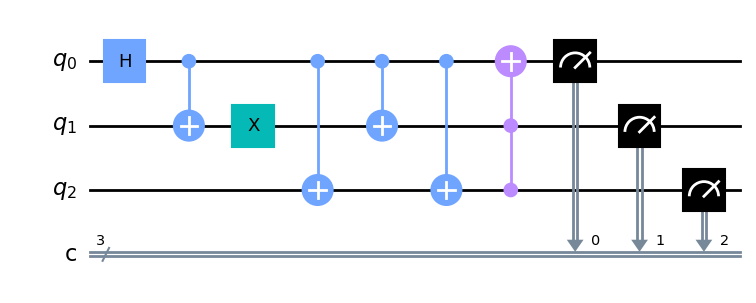

In [26]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum error correction circuit using the bit-flip code
def create_error_correction_circuit():
    # Create a 3-qubit circuit for the bit-flip code
    error_correction_circuit = QuantumCircuit(3, 3)

    # Encode the logical |0⟩ state using three physical qubits
    error_correction_circuit.h(0)
    error_correction_circuit.cx(0, 1)
    error_correction_circuit.cx(0, 2)

    # Introduce a bit-flip error on the second qubit
    error_correction_circuit.x(1)

    # Apply error correction by measuring ancilla qubits
    error_correction_circuit.cx(0, 1)
    error_correction_circuit.cx(0, 2)
    error_correction_circuit.ccx(2, 1, 0)
    error_correction_circuit.measure([0, 1, 2], [0, 1, 2])

    return error_correction_circuit

# Simulate the quantum error correction circuit
error_correction_circuit = create_error_correction_circuit()

backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(error_correction_circuit, backend)
qobj = assemble(transpiled_circuit)
result = execute(transpiled_circuit, backend).result()
counts = result.get_counts()

# Display the result
print("Measurement results:")
print(counts)

# Visualize the circuit
error_correction_circuit.draw(output='mpl')

# Visualize the error correction circuit
transpiled_circuit.draw(output='mpl')


Measurement results:
{'101': 517, '000': 507}


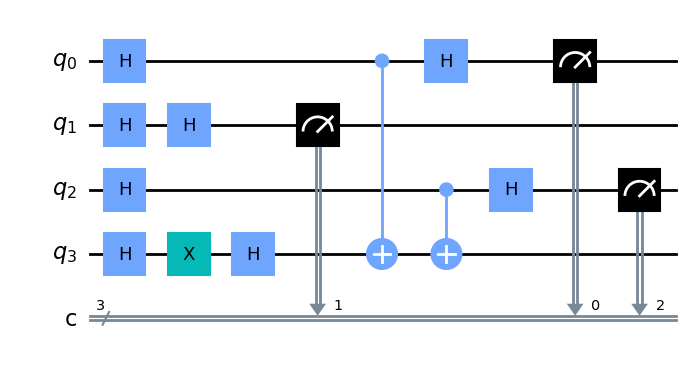

In [27]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum circuit for the Bernstein-Vazirani algorithm
def bernstein_vazirani_algorithm(secret_number):
    n = len(secret_number)
    
    # Create a quantum circuit with n+1 qubits
    circuit = QuantumCircuit(n+1, n)
    
    # Apply Hadamard gate to all qubits
    circuit.h(range(n+1))
    
    # Apply X and H gate to the last qubit
    circuit.x(n)
    circuit.h(n)
    
    # Apply CNOT gates with the last qubit as the control and all other qubits as targets
    for qubit in range(n):
        if secret_number[qubit] == '1':
            circuit.cx(qubit, n)
    
    # Apply Hadamard gate to the first n qubits
    circuit.h(range(n))
    
    # Measure the first n qubits
    circuit.measure(range(n), range(n))
    
    return circuit

# Secret number to be identified (change as needed)
secret_number = '101'

# Create the Bernstein-Vazirani circuit
bv_circuit = bernstein_vazirani_algorithm(secret_number)

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_bv_circuit = transpile(bv_circuit, backend)
qobj = assemble(transpiled_bv_circuit)
result = execute(transpiled_bv_circuit, backend).result()
counts = result.get_counts()

# Display the result
print("Measurement results:")
print(counts)

# Visualize the circuit
bv_circuit.draw(output='mpl')
